In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os
from scipy.stats import randint as sp_randint
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer, normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import itertools
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
np.random.seed(11)

In [3]:
cwd = os.getcwd()
pitchers = pd.read_csv(cwd + ('/cleaned/fixed_complete_list.csv'))
pitchers.drop(columns= ['Name','year','birthYear','birthMonth', 'birthDay', 'birthState', 'birthCity', 'Unnamed: 0'], axis=1, inplace=True)

In [631]:
full_df = pitchers.copy(deep=True)

In [4]:
pitchers = pitchers.reindex(columns = ['Age', 'in_majors', 'teamID', 'lgID', 'birthCountry', 'weight',
       'height', 'throws', 'W', 'L', 'G', 'GS', 'IP', 'H', 'HR', 'BAOpp',
       'ERA', 'SF', 'GIDP', 'Balls', 'Strikes', 'Pitches', 'FB%', 'SL%', 'CT%',
       'CB%', 'CH%', 'SF%', 'KN%', 'XX%', 'num_pitches', 'avg_velo',
       'previous', 'injured'])

In [5]:
pitchers.replace({'yes' : 1, 'no' : 0}, inplace=True)

In [484]:
len(pitchers)

6919

In [6]:
df_left = pitchers[['teamID', 'lgID', 'birthCountry','throws', 'previous']] 

In [7]:
#Normalize specific columns
to_norm = ['Age', 'in_majors', 'weight','height', 'W', 'L', 'G', 'GS', 'IP', 'H', 'HR', 'BAOpp','ERA', 'SF', 'GIDP', 'Balls', 'Strikes', 'Pitches', 'FB%', 'SL%', 'CT%',
       'CB%', 'CH%', 'SF%', 'KN%', 'XX%', 'num_pitches', 'avg_velo',]
df_norm = pitchers[to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
full_df = pd.concat([df_norm, df_left], axis = 1)

In [9]:
data_norm = pd.get_dummies(full_df)

In [15]:
X_train_n, X_test_n, i_train_n, i_test_n = train_test_split(data_norm, inj, test_size = .3)

In [16]:
data_norm.head()

Age  in_majors   weight    height         W         L         G  \
0  0.266667   0.192308  0.37500  0.529412  0.125000  0.315789  0.791209   
1  0.433333   0.115385  0.09375  0.470588  0.000000  0.000000  0.010989   
2  0.433333   0.115385  0.09375  0.470588  0.000000  0.000000  0.021978   
3  0.266667   0.153846  0.25000  0.352941  0.000000  0.000000  0.274725   
4  0.233333   0.038462  0.31250  0.470588  0.416667  0.052632  0.461538   

         GS        IP         H    ...     birthCountry_Saudi Arabia  \
0  0.000000  0.283267  0.187023    ...                             0   
1  0.000000  0.023904  0.011450    ...                             0   
2  0.000000  0.023904  0.026718    ...                             0   
3  0.000000  0.096414  0.087786    ...                             0   
4  0.028571  0.334661  0.263359    ...                             0   

   birthCountry_South Korea  birthCountry_Taiwan  birthCountry_USA  \
0                         0                    0                 1   
1                         0                    0                 0   
2                         0                    0                 0   
3                         0                    0                 1   
4                         0                    0                 0   

   birthCountry_United Kingdom  birthCountry_V.I.  birthCountry_Venezuela  \
0                            0                  0                       0   
1                            0                  0                       0   
2                            0                  0                       0   
3                            0                  0                       0   
4                            0                  0                       0   

   throws_L  throws_R  throws_S  
0         0         1         0  
1         0         1         0  
2         0         1         0  
3         0         1         0  
4         0         1         0  

[5 rows x 90 columns]

# Scatterplot Matrix

In [333]:
main_2_me = full_df.drop(columns = ['bats', 'IBB',  'HBP', 'BK', 'BFP', 'GF', 'SV','FB%', 'FBv', 'SL%', 'SLv', 'CT%', 'CTv', 'CB%','GS', 'Balls', 'Strikes', 
       'CBv', 'CH%', 'CHv', 'SF%', 'SFv', 'KN%', 'KNv', 'XX%', 'CG', 'SHO', 'WP','ER', 'BB', 'SO', 'IPouts','SH', 'SF', 'GIDP','R', ])

In [335]:
main_pitch = pitchers.copy(deep=True)

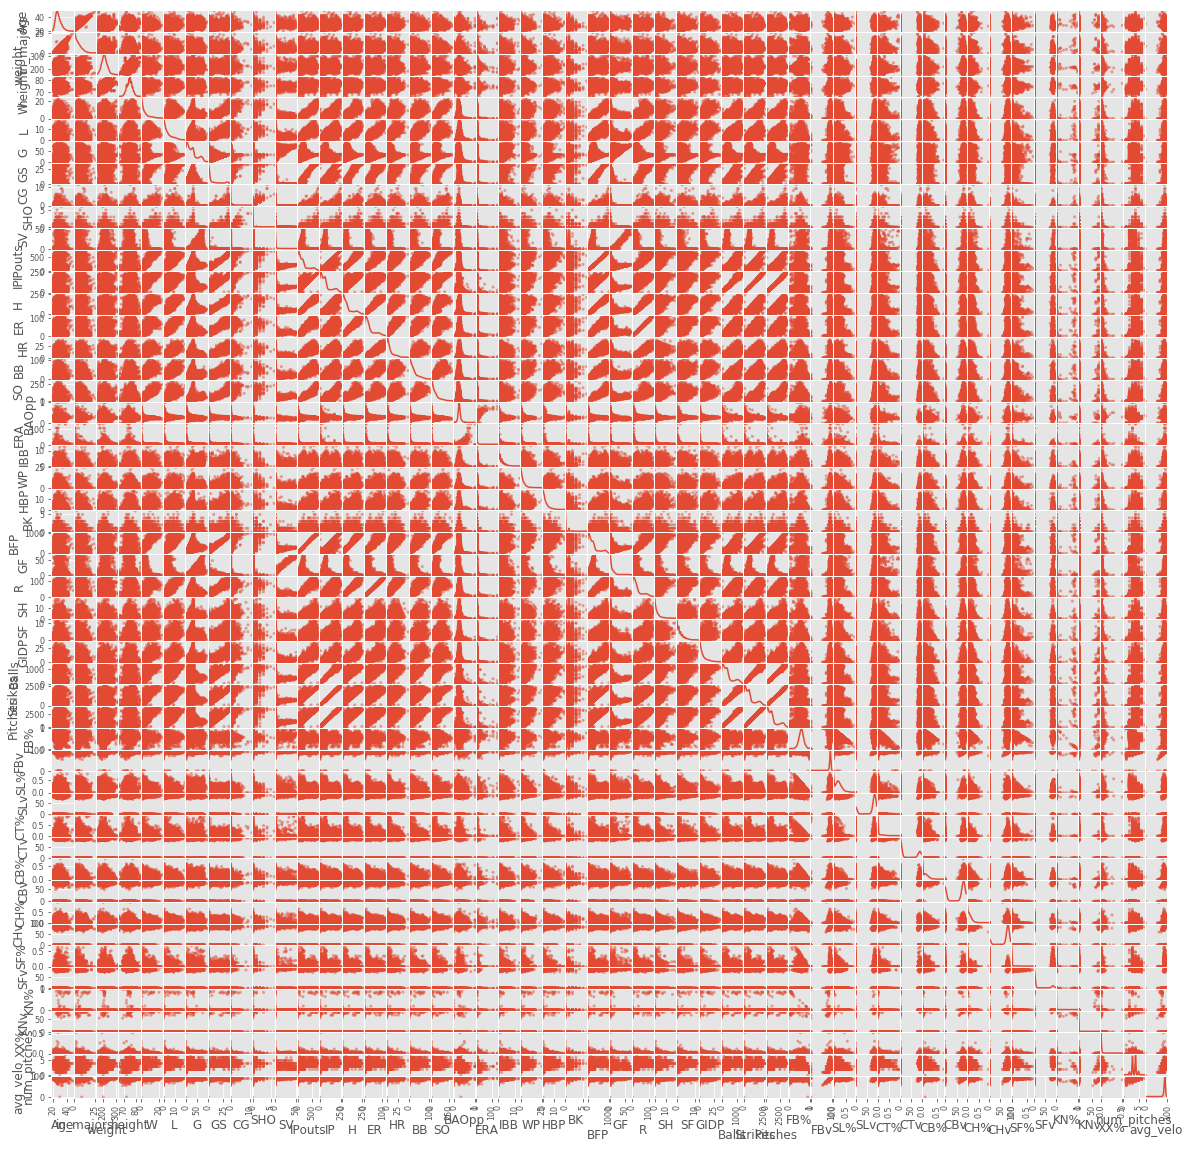

In [274]:
names = full_df.columns
scatter_matrix(full_df, figsize = (20, 20), diagonal = 'kde')
plt.show()


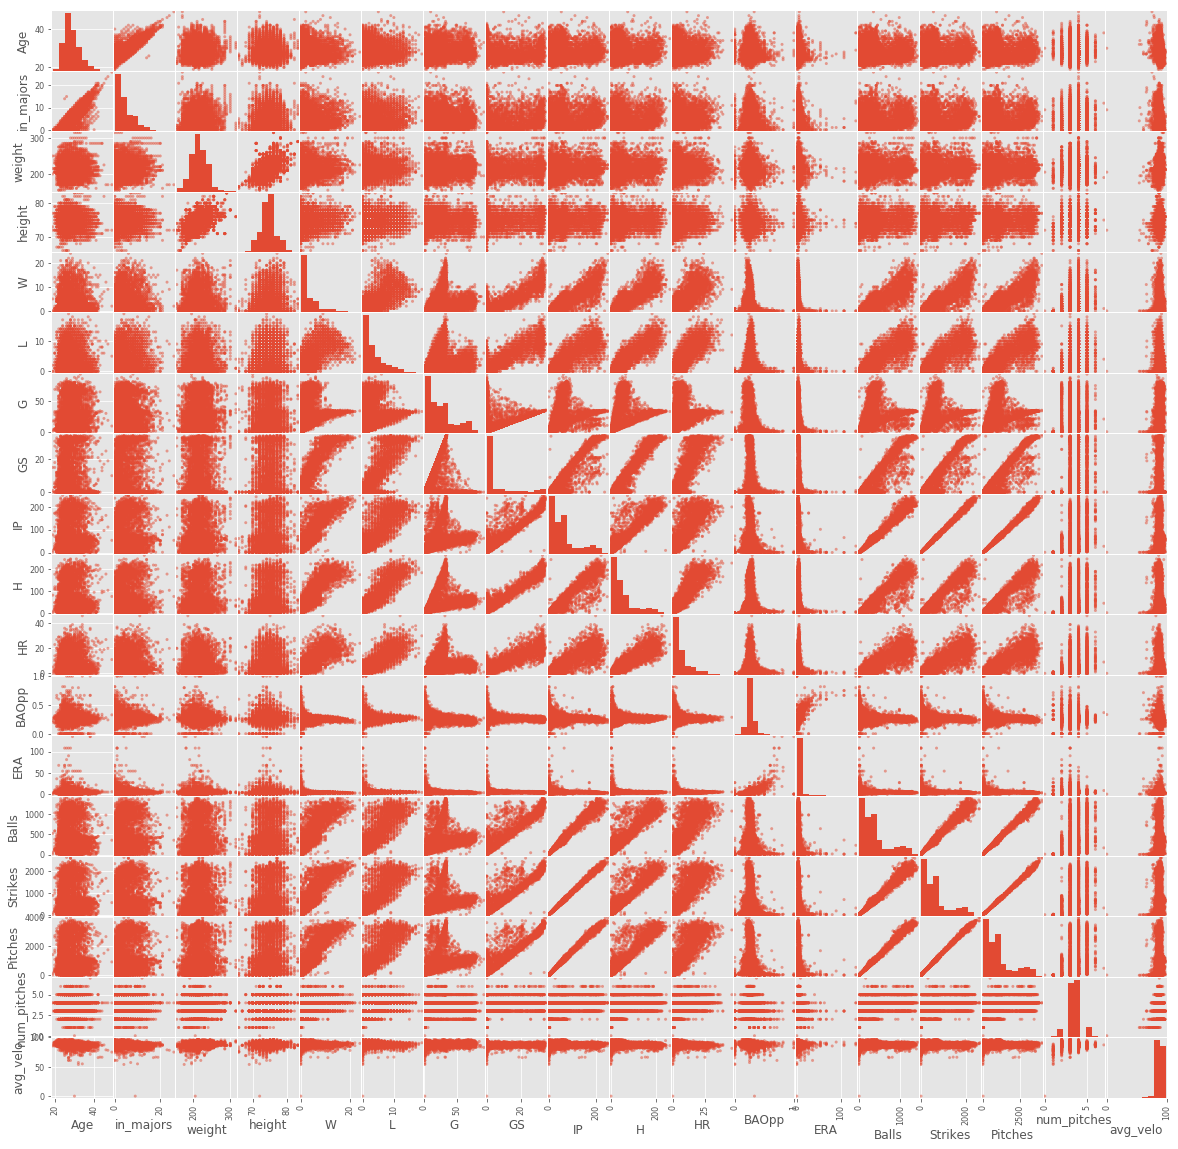

In [293]:

scatter_matrix(main_2_me , figsize = (15, 15), diagonal = 'hist')
plt.show()



# Correlation Matrix Plot

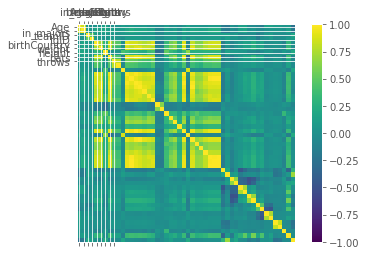

In [280]:
names = full_df.columns
data = full_df
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [17]:
def plot_roc_curve(fpr, tpr, model='ROC'):
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    print('AUC: {}'.format(metrics.auc(fpr, tpr)))
    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve for ' + model)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return

# Splitting

In [11]:
inj = pitchers.injured
# inj.replace({'yes' : 1, 'no' : 0}, inplace=True)
pitchers.drop(columns= ["injured"], axis=1, inplace=True)

In [12]:
inj.sum() #was 2702

2620

In [13]:
data = pd.get_dummies(pitchers)

In [14]:
data.head()

Age  in_majors  weight  height     W    L     G   GS    IP     H    ...     \
0   27          5   215.0    75.0   3.0  6.0  73.0  0.0  71.1  49.0    ...      
1   32          3   170.0    74.0   0.0  0.0   2.0  0.0   6.0   3.0    ...      
2   32          3   170.0    74.0   0.0  0.0   3.0  0.0   6.0   7.0    ...      
3   27          4   195.0    72.0   0.0  0.0  26.0  0.0  24.2  23.0    ...      
4   26          1   205.0    74.0  10.0  1.0  43.0  1.0  84.0  69.0    ...      

   birthCountry_Saudi Arabia  birthCountry_South Korea  birthCountry_Taiwan  \
0                          0                         0                    0   
1                          0                         0                    0   
2                          0                         0                    0   
3                          0                         0                    0   
4                          0                         0                    0   

   birthCountry_USA  birthCountry_United Kingdom  birthCountry_V.I.  \
0                 1                            0                  0   
1                 0                            0                  0   
2                 0                            0                  0   
3                 1                            0                  0   
4                 0                            0                  0   

   birthCountry_Venezuela  throws_L  throws_R  throws_S  
0                       0         0         1         0  
1                       0         0         1         0  
2                       0         0         1         0  
3                       0         0         1         0  
4                       0         0         1         0  

[5 rows x 90 columns]

In [18]:
X_train, X_test, i_train, i_test = train_test_split(data, inj, test_size = .3)

# Smote

In [19]:
sm = SMOTE(ratio = 1.0)

In [20]:
X_train_sm, i_train_sm = sm.fit_sample(X_train, i_train)

/Users/arihorwitz/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [532]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
sm_rf = clf_rf.fit(X_train_sm, i_train_sm)
notsm_rf = clf_rf.fit(X_train, i_train)

In [519]:
len(X_train_sm)

5998

In [520]:
len(X_train)

4843

# Naive Bayes

In [617]:
#using multinomial (no negatives)
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, i_train)
mnb_preds = mnb_clf.predict(X_test)
mnb_testing_accuracy = accuracy_score(i_test, mnb_preds)
mnb_testing_accuracy

0.6276493256262042

In [618]:
#with SMOTE applied
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train_sm, i_train_sm)
mnb_preds = mnb_clf.predict(X_test)
mnb_testing_accuracy = accuracy_score(i_test, mnb_preds)
mnb_testing_accuracy

0.6286127167630058

In [665]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train_n, i_train_n)
mnb_preds = mnb_clf.predict(X_test_n)
mnb_testing_accuracy = accuracy_score(i_test_n, mnb_preds)
mnb_testing_accuracy

0.6430635838150289

In [619]:
#Gaussian
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, i_train)
gnb_preds = mnb_clf.predict(X_test)
gnb_testing_accuracy = accuracy_score(i_test, gnb_preds)
gnb_testing_accuracy

0.6286127167630058

In [620]:
#with SMOTE applied
gnb_clf = GaussianNB()
gnb_clf.fit(X_train_sm, i_train_sm)
gnb_preds = mnb_clf.predict(X_test)
gnb_testing_accuracy = accuracy_score(i_test, gnb_preds)
gnb_testing_accuracy

0.6286127167630058

In [664]:
#normalized
gnb_clf = GaussianNB()
gnb_clf.fit(X_train_n, i_train_n)
gnb_preds = mnb_clf.predict(X_test_n)
gnb_testing_accuracy = accuracy_score(i_test_n, gnb_preds)
gnb_testing_accuracy

0.617533718689788

In [533]:
# a random forestwithout smote
clf_rf.score(X_train, i_train)

0.9993805492463349

In [ ]:
clf_rf .score(X_test, i_test)

accuracy................. 0.6628
precision................ 0.5990
recall................... 0.2964
F1....................... 0.3966


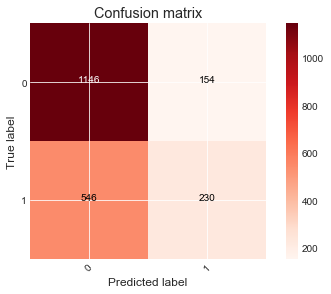

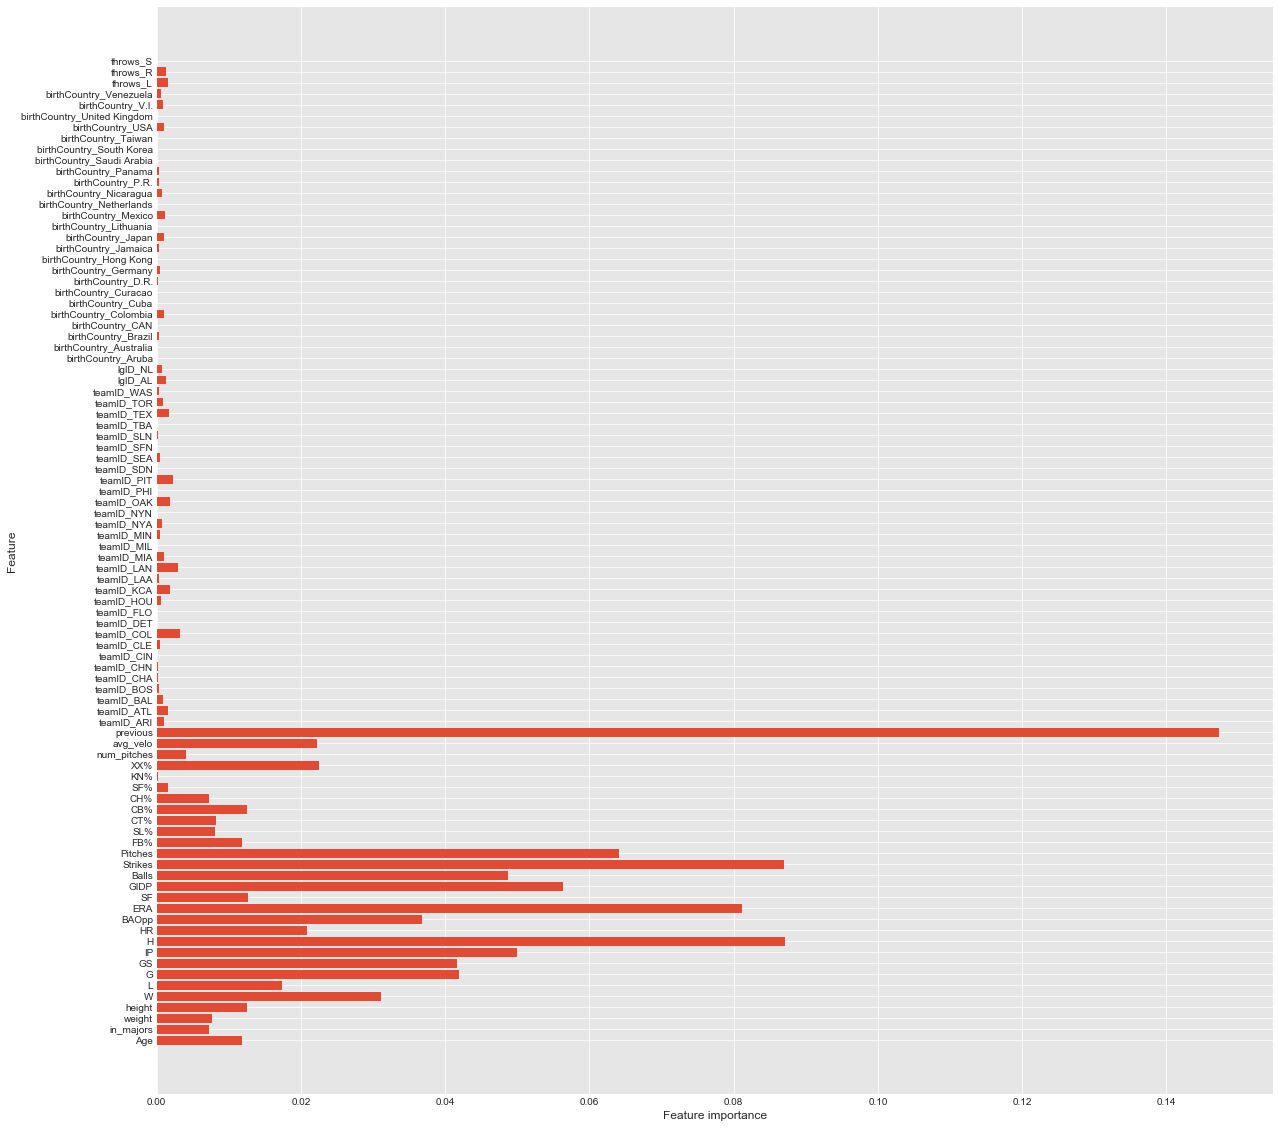

In [602]:
rfsmpred= clf_rf.predict(X_test)
rfsmtree_cm = metrics.confusion_matrix(i_test, rfsmpred)
plt.figure()
plot_confusion_matrix(rfsmtree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(clf_rf)

In [534]:
clf_rf.score(X_train_sm, i_train_sm )

0.9994998332777593

In [535]:
clf_rf.score(X_test, i_test)

0.7013487475915221

accuracy................. 0.7013
precision................ 0.6057
recall................... 0.5760
F1....................... 0.5905


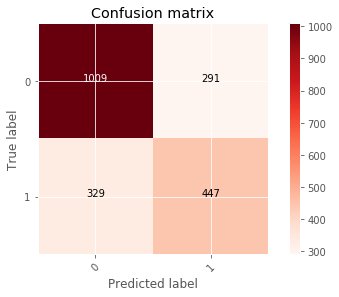

In [536]:
rfsmpred= clf_rf.predict(X_test)
rfsmtree_cm = metrics.confusion_matrix(i_test, rfsmpred)
plt.figure()
plot_confusion_matrix(rfsmtree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

In [537]:
clf_rf.feature_importances_ 

array([2.99413856e-02, 2.87057478e-02, 2.48708407e-02, 2.19894323e-02,
       3.05018440e-02, 1.96002313e-02, 2.84739406e-02, 1.46457308e-02,
       3.76453317e-02, 3.38605346e-02, 2.46441919e-02, 3.78730528e-02,
       4.07928280e-02, 1.97229369e-02, 2.49503010e-02, 3.93938336e-02,
       4.35133895e-02, 4.15667142e-02, 3.37261053e-02, 2.89587006e-02,
       1.44662261e-02, 2.66893302e-02, 2.96659485e-02, 7.25887886e-03,
       5.58996489e-04, 3.01349863e-02, 1.53817838e-02, 3.73948263e-02,
       9.38887352e-02, 2.20144426e-03, 1.90463445e-03, 1.82007379e-03,
       2.39336328e-03, 1.34179639e-03, 2.35215925e-03, 1.25562419e-03,
       2.29198203e-03, 2.86986408e-03, 1.68461111e-03, 7.00159205e-04,
       2.24846257e-03, 1.88536514e-03, 2.46911012e-03, 4.55413098e-03,
       2.16553354e-03, 2.24076020e-03, 2.38903477e-03, 2.63759992e-03,
       2.72897848e-03, 2.12636393e-03, 1.53064354e-03, 2.45036363e-03,
       2.08718704e-03, 2.22466807e-03, 1.51523599e-03, 2.29764379e-03,
      

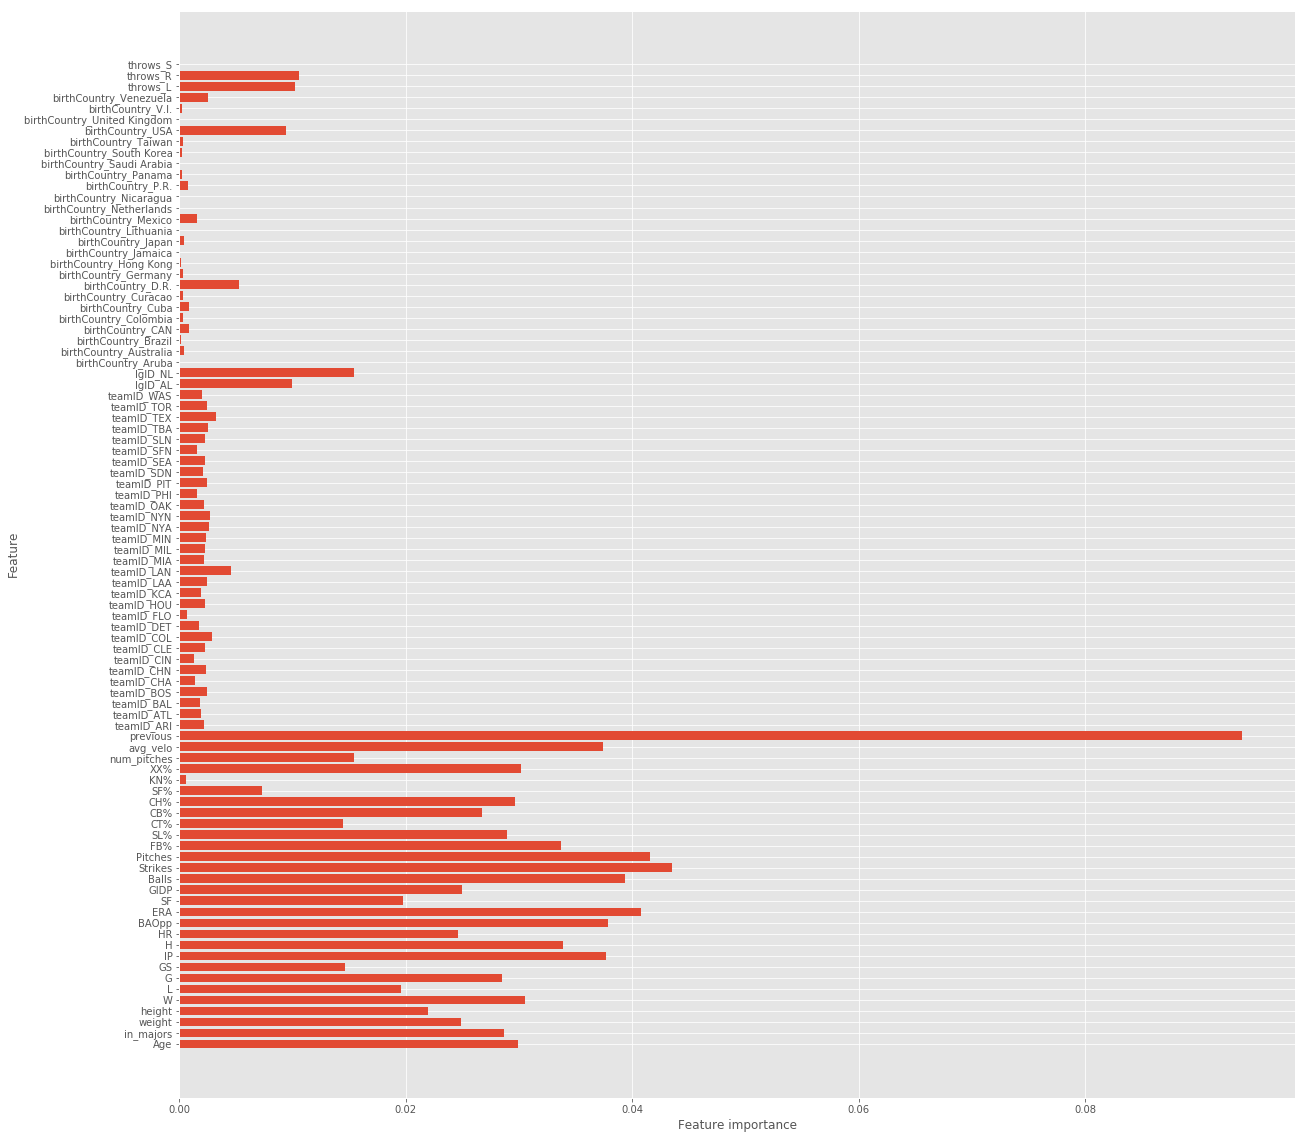

In [540]:
# rfm.feature_importances_
plot_feature_importances(clf_rf)

# Decision Tree

In [488]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 10) 
tree_clf.fit(X_train, i_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [467]:
tree_clf.feature_importances_

array([0.00000000e+00, 1.05875660e-02, 0.00000000e+00, 5.91064714e-03,
       1.35591599e-03, 1.53877133e-03, 2.63203647e-02, 1.31465985e-02,
       2.21062097e-02, 5.52648883e-03, 7.22273917e-03, 1.23024197e-02,
       7.42193775e-03, 0.00000000e+00, 1.41054039e-03, 8.74199146e-03,
       0.00000000e+00, 8.70220903e-03, 1.54302092e-02, 7.69385667e-04,
       9.74512232e-03, 2.46203413e-03, 0.00000000e+00, 2.64760943e-03,
       2.06017471e-03, 5.65061634e-03, 1.30364015e-03, 7.24838316e-03,
       8.05395629e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.20619817e-03, 0.00000000e+00, 1.38489420e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58954196e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.51092212e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.12221505e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28938426e-03,
      

In [489]:
pred= tree_clf.predict(X_test)
tree_cm = metrics.confusion_matrix(i_test, pred)
print(metrics.confusion_matrix(i_test, pred))
print(metrics.classification_report(i_test, pred))

[[874 426]
 [312 464]]
             precision    recall  f1-score   support

          0       0.74      0.67      0.70      1300
          1       0.52      0.60      0.56       776

avg / total       0.66      0.64      0.65      2076



In [21]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' #'.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    true_negative  = cm[0,0]
    true_positive  = cm[1,1]
    false_negative = cm[1,0]
    false_positive = cm[0,1]
    total = true_negative + true_positive + false_negative + false_positive
    accuracy = (true_positive + true_negative)/total
    precision = (true_positive)/(true_positive + false_positive)
    recall = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1 = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('F1.......................%7.4f' % F1)

accuracy................. 0.6445
precision................ 0.5213
recall................... 0.5979
F1....................... 0.5570


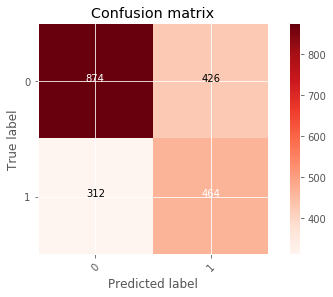

In [490]:
plt.figure()
plot_confusion_matrix(tree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

In [666]:
#normalized
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 10) 
tree_clf.fit(X_train_n, i_train_n)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

accuracy................. 0.6614
precision................ 0.5537
recall................... 0.5907
F1....................... 0.5716


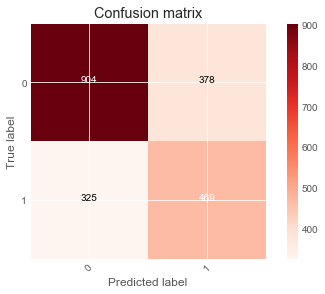

In [667]:
pred= tree_clf.predict(X_test_n)
tree_cm = metrics.confusion_matrix(i_test_n, pred)
plt.figure()
plot_confusion_matrix(tree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

# Random Forest

In [491]:
#non smote
rfm = RandomForestClassifier(n_estimators=100, max_depth=5)
rfm.fit(X_train, i_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [492]:
rfm.score(X_train, i_train)

0.7228990295271526

In [493]:
rfm.score(X_test, i_test)

0.6893063583815029

In [436]:
rfm.feature_importances_

array([3.22476191e-02, 5.40782727e-02, 3.29898187e-03, 3.16624959e-03,
       1.09785020e-02, 5.81058468e-03, 4.67285559e-02, 3.41421260e-02,
       1.99273436e-02, 1.33548403e-02, 6.26487013e-03, 4.05064529e-03,
       7.34337518e-03, 2.50565430e-03, 4.84902953e-03, 1.74920055e-02,
       3.24530567e-02, 3.63593881e-02, 6.24080731e-03, 3.56937027e-03,
       3.70724575e-03, 3.46129665e-03, 4.25792178e-03, 1.41556824e-03,
       7.11846651e-05, 6.91099359e-03, 1.31290049e-03, 6.57423614e-03,
       5.48373327e-04, 3.21539224e-04, 2.09603019e-05, 4.92221293e-04,
       2.66075955e-04, 5.34171604e-05, 2.76850054e-04, 2.05895587e-04,
       8.08432847e-05, 1.85653641e-04, 2.63518882e-04, 1.96996747e-04,
       1.06019717e-05, 1.41487952e-05, 3.44751788e-03, 1.28694020e-04,
       9.72207296e-05, 6.95368882e-04, 5.08008391e-04, 3.01350339e-04,
       1.67054104e-04, 4.02013883e-04, 3.35827303e-04, 3.69990267e-04,
       4.43560713e-05, 1.18818944e-05, 1.81263480e-04, 8.56550781e-05,
      

In [30]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

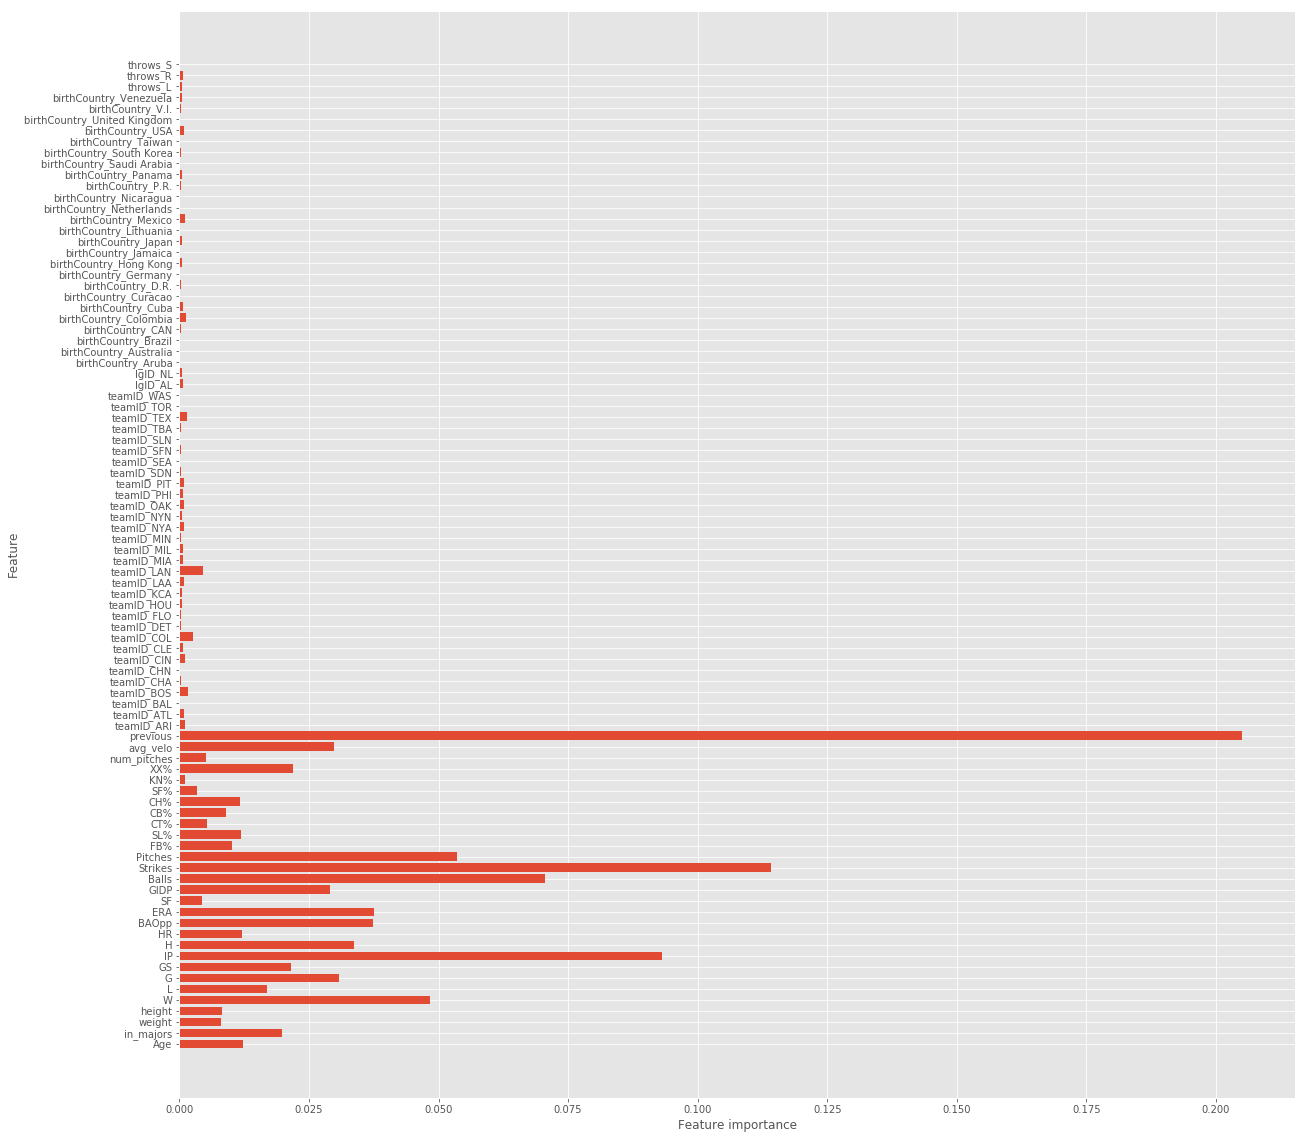

In [494]:
rfm.feature_importances_
plot_feature_importances(rfm)

In [238]:
rfm.estimators_[1]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1323323742, splitter='best')

In [239]:
rfm.estimators_[77]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=80493870, splitter='best')

In [497]:
rfm = RandomForestClassifier(n_estimators=250, max_depth=5)
rfm_model = rfm.fit(X_train, i_train)

In [526]:
rfm_model.score(X_train, i_train)

0.7251703489572578

In [528]:
rfm_model.score(X_test, i_test)

0.6840077071290944

In [529]:
rfpred= rfm_model.predict(X_test)
rftree_cm = metrics.confusion_matrix(i_test, rfpred)
print(metrics.confusion_matrix(i_test, rfpred))
print(metrics.classification_report(i_test, rfpred))

[[1031  269]
 [ 387  389]]
             precision    recall  f1-score   support

          0       0.73      0.79      0.76      1300
          1       0.59      0.50      0.54       776

avg / total       0.68      0.68      0.68      2076



accuracy................. 0.6840
precision................ 0.5912
recall................... 0.5013
F1....................... 0.5425


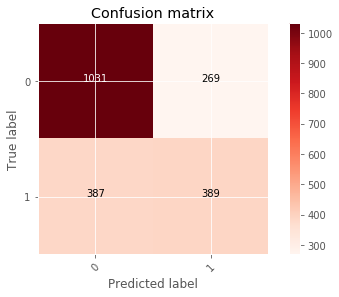

In [530]:
plt.figure()
plot_confusion_matrix(rftree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

accuracy................. 0.8315
precision................ 1.0000
recall................... 0.5770
F1....................... 0.7318


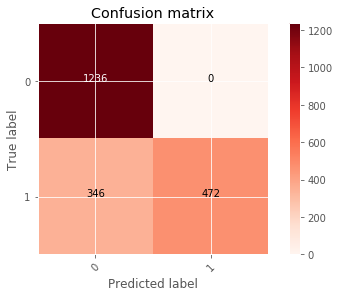

In [352]:
plt.figure()
plot_confusion_matrix(rftree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

In [381]:
import graphviz 
from sklearn.tree import export_graphviz

In [386]:
rfm_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [514]:
export_graphviz(rfm_model , out_file="mytree.dot", feature_names=X_train.columns , class_names=list(inj_train), rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [389]:
tree_2 = rfm_model.estimators_[0].fit(X_train, inj_train.iloc[:,1])
export_graphviz(tree_2, out_file="mytree.dot", feature_names=X_train.columns , class_names=list(inj_train), rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

IndexingError: Too many indexers

In [550]:
#comparing to SMOTE
clf_rf = RandomForestClassifier(n_estimators=25,  max_depth=5, random_state=12)
sm_rf = clf_rf.fit(X_train_sm, i_train_sm)
notsm_rf = clf_rf.fit(X_train, i_train)

In [551]:
sm_rf.score(X_train_sm, i_train_sm)

0.6757252417472491

In [552]:
sm_rf.score(X_test, i_test)

0.6907514450867052

In [553]:
notsm_rf.score(X_train, i_train)

0.7125748502994012

In [554]:
notsm_rf.score(X_test, i_test)

0.6907514450867052

accuracy................. 0.6908
precision................ 0.6106
recall................... 0.4768
F1....................... 0.5355


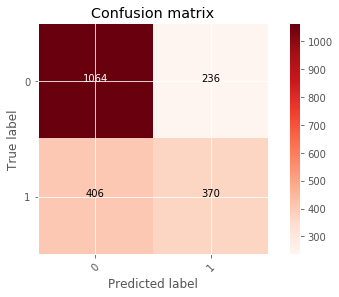

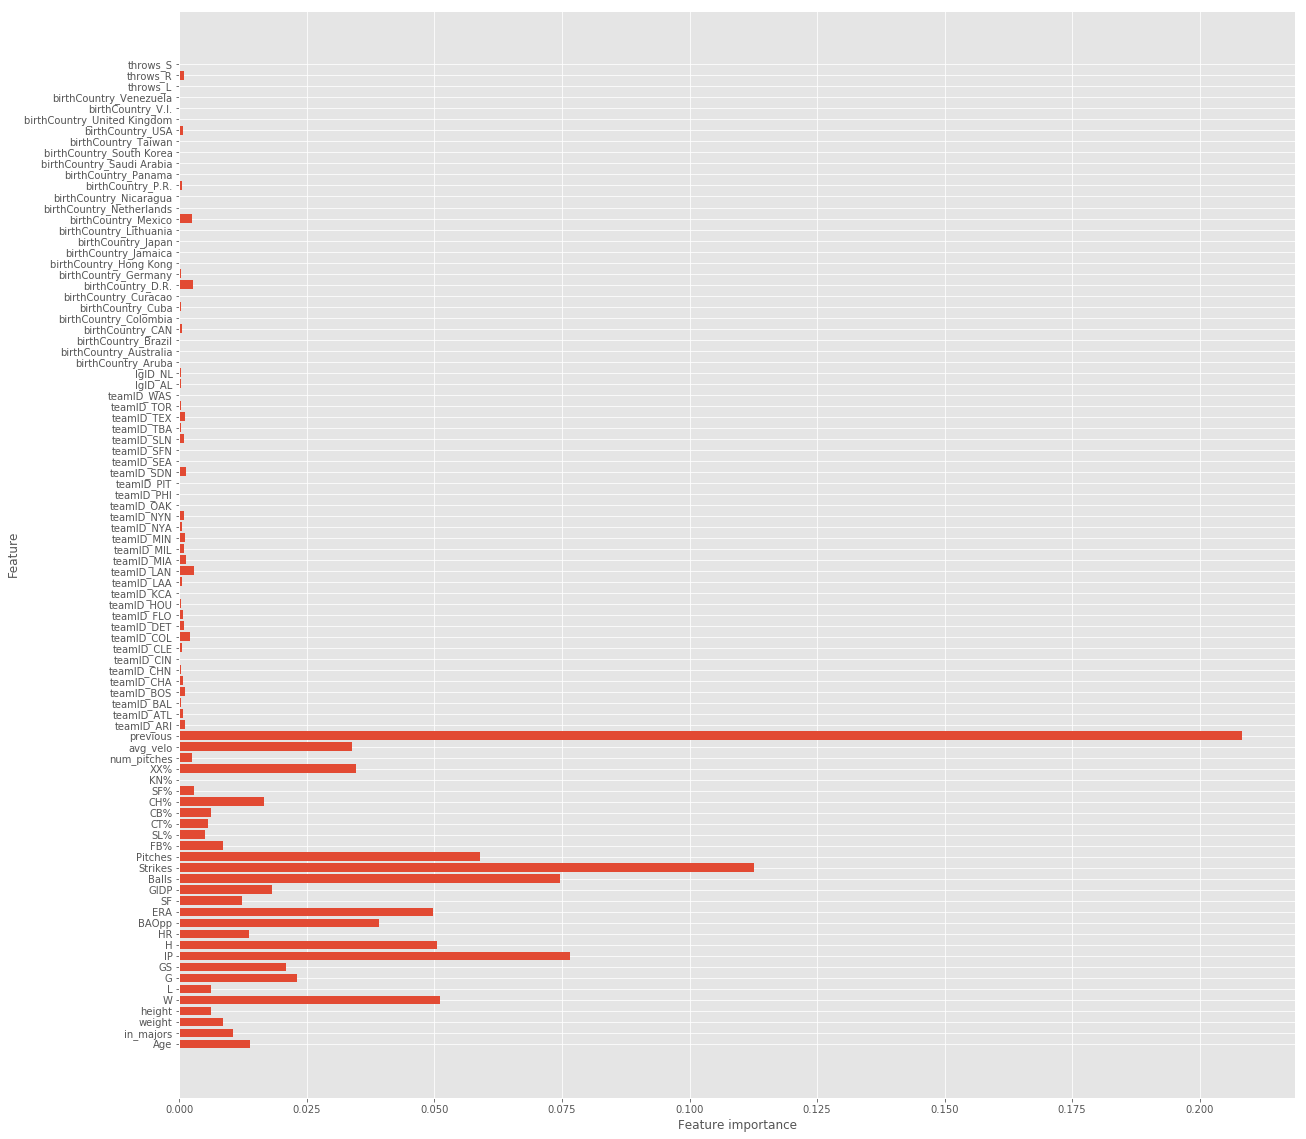

In [555]:
rfsmpred= sm_rf.predict(X_test)
rfsmtree_cm = metrics.confusion_matrix(i_test, rfsmpred)
plt.figure()
plot_confusion_matrix(rfsmtree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(sm_rf)

accuracy................. 0.6908
precision................ 0.6106
recall................... 0.4768
F1....................... 0.5355


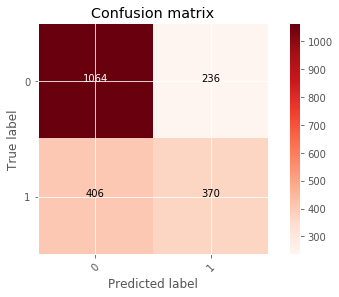

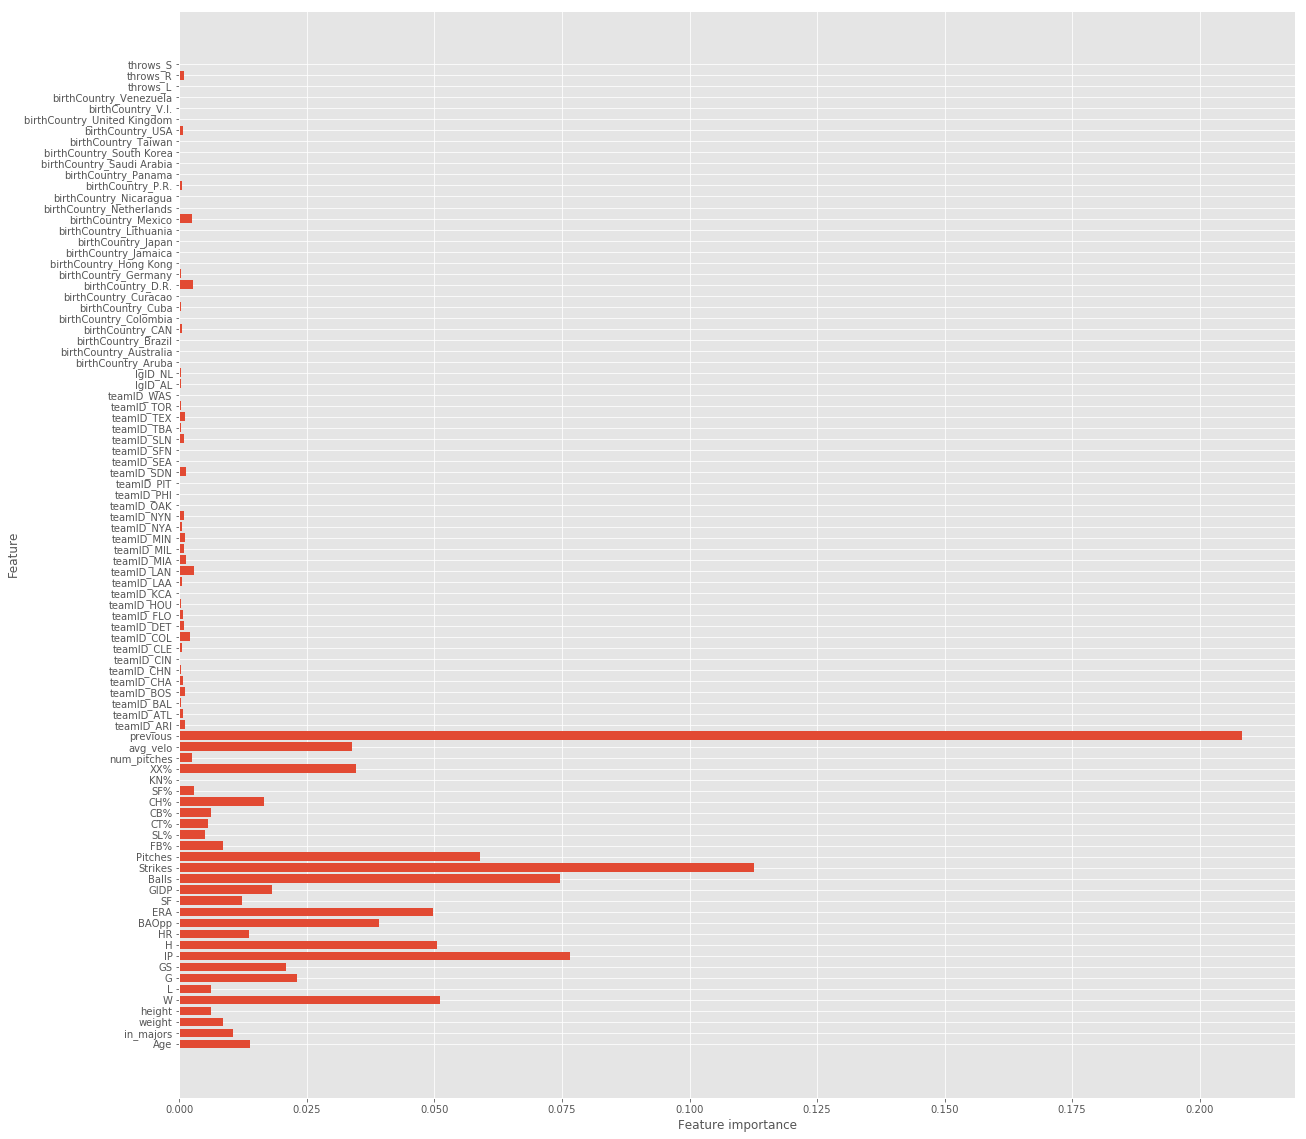

In [556]:
notrfsmpred= notsm_rf.predict(X_test)
notrfsmtree_cm = metrics.confusion_matrix(i_test, notrfsmpred)
plt.figure()
plot_confusion_matrix(notrfsmtree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(notsm_rf)

accuracy................. 0.6985
precision................ 0.6161
recall................... 0.5129
F1....................... 0.5598


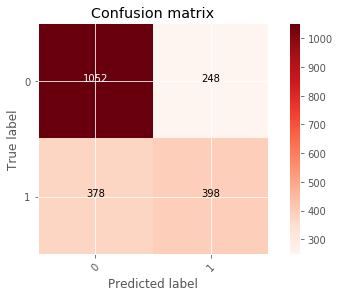

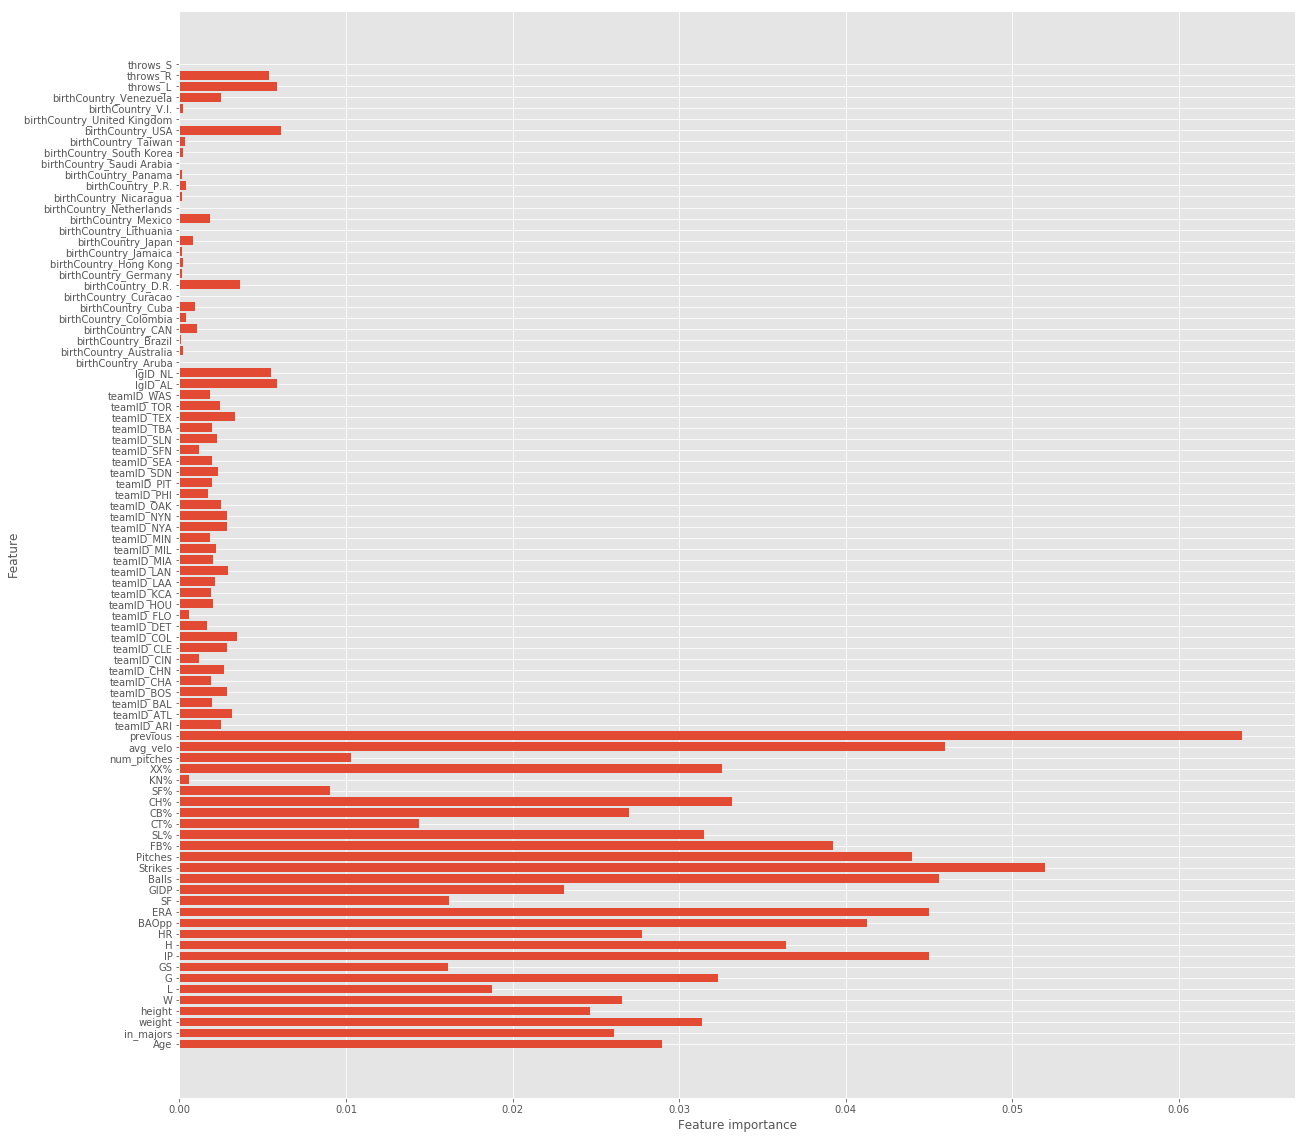

In [549]:
notrfsmpred= notsm_rf.predict(X_test)
notrfsmtree_cm = metrics.confusion_matrix(i_test, notrfsmpred)
plt.figure()
plot_confusion_matrix(notrfsmtree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(notsm_rf)

In [580]:
clf_rf = RandomForestClassifier(n_estimators=25, max_features= 5, max_depth=5, random_state=12)
sm_rf = clf_rf.fit(X_train_sm, i_train_sm)
notsm_rf = clf_rf.fit(X_train, i_train)

In [581]:
sm_rf.score(X_train_sm, i_train_sm)

0.6247082360786929

In [582]:
sm_rf.score(X_test, i_test)

0.6628131021194605

accuracy................. 0.6628
precision................ 0.5990
recall................... 0.2964
F1....................... 0.3966


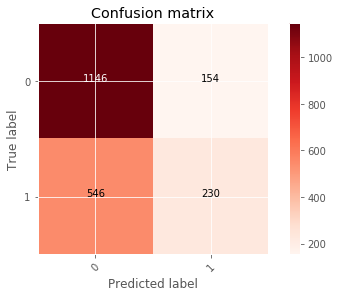

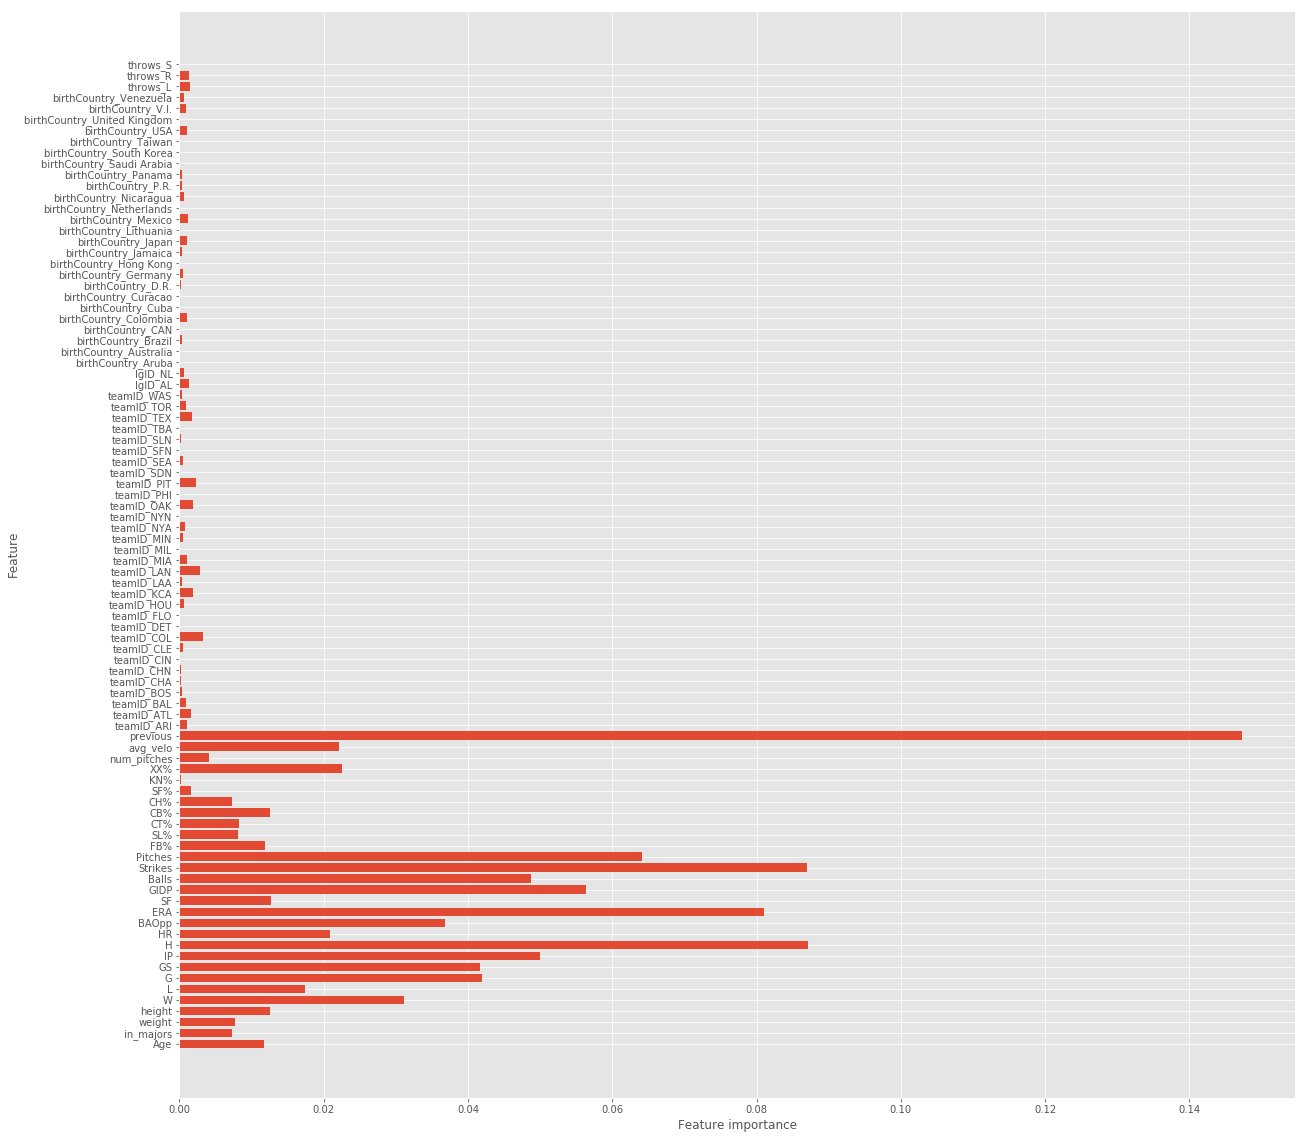

In [583]:
rfsmpred= sm_rf.predict(X_test)
rfsmtree_cm = metrics.confusion_matrix(i_test, rfsmpred)
plt.figure()
plot_confusion_matrix(rfsmtree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(sm_rf)

In [577]:
notsm_rf.score(X_train, i_train)

0.689035721660128

In [578]:
notsm_rf.score(X_test, i_test)

0.6628131021194605

accuracy................. 0.6628
precision................ 0.5990
recall................... 0.2964
F1....................... 0.3966


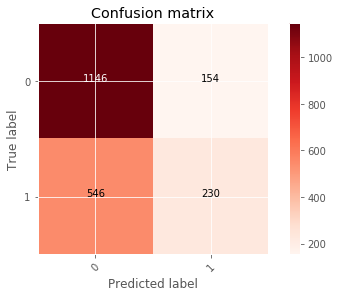

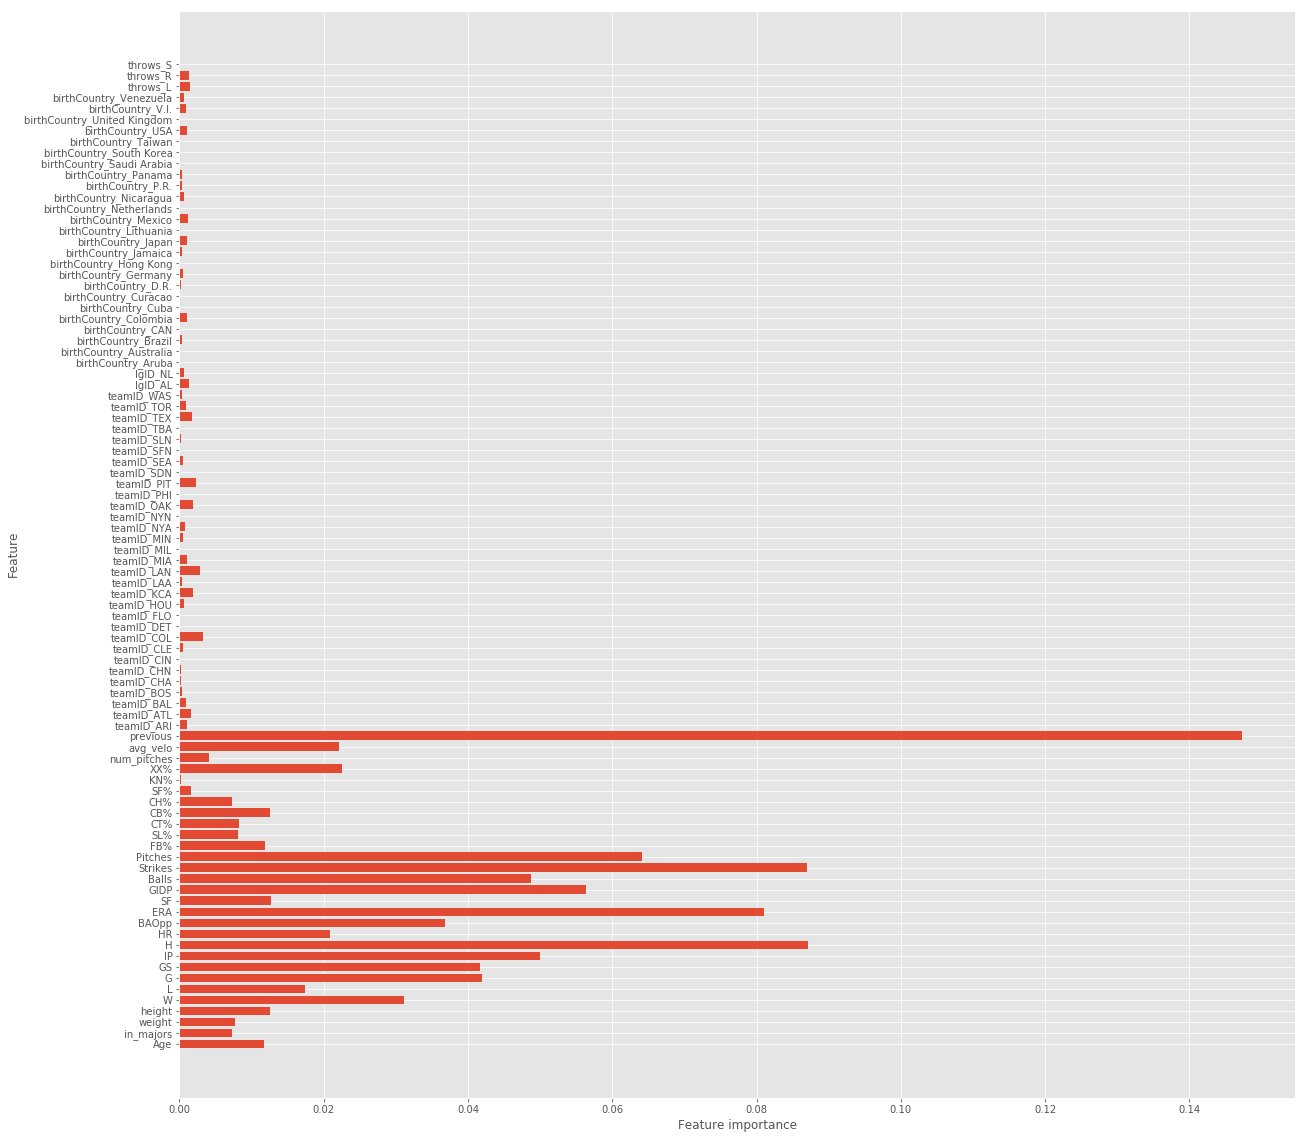

In [579]:
notrfsmpred= notsm_rf.predict(X_test)
notrfsmtree_cm = metrics.confusion_matrix(i_test, notrfsmpred)
plt.figure()
plot_confusion_matrix(notrfsmtree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(notsm_rf)

In [668]:
#normalized
norm_rf = clf_rf.fit(X_train_n, i_train_n)

In [669]:
norm_rf.score(X_train_n, i_train_n)

0.6811893454470369

In [670]:
norm_rf.score(X_test_n, i_test_n)

0.6560693641618497

accuracy................. 0.6561
precision................ 0.6235
recall................... 0.2544
F1....................... 0.3614


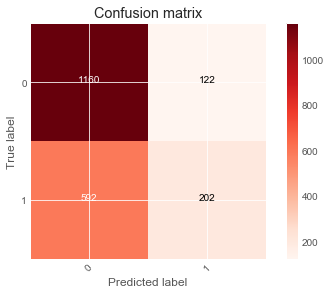

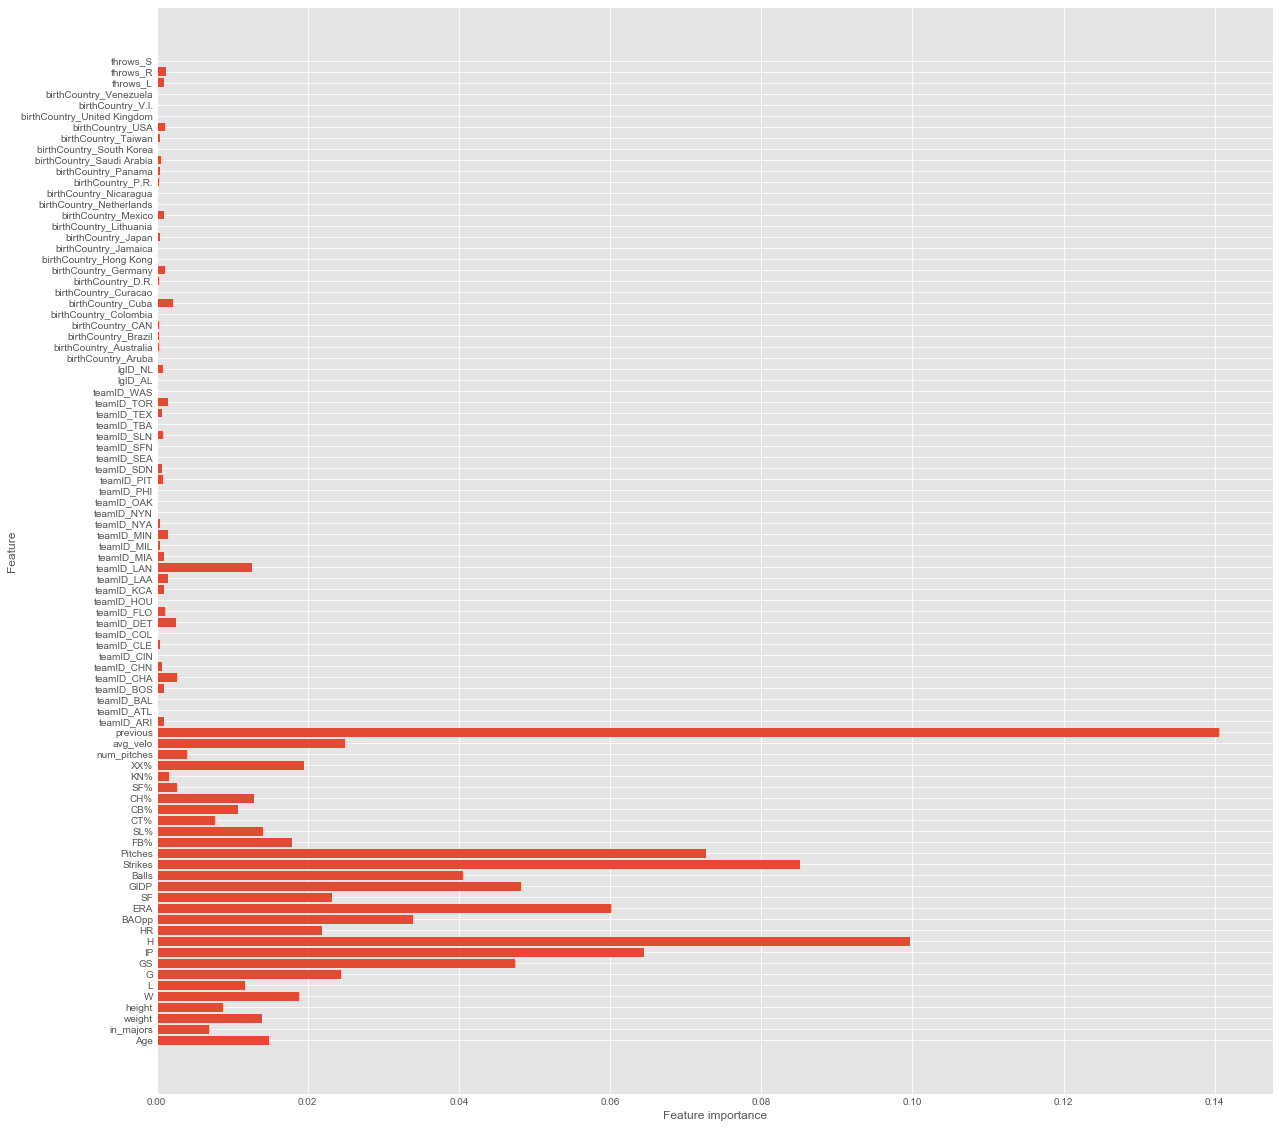

In [672]:
normrfpred= norm_rf.predict(X_test_n)
normrftree_cm = metrics.confusion_matrix(i_test_n, normrfpred)
plt.figure()
plot_confusion_matrix(normrftree_cm, classes=set(inj),
                      title='Confusion matrix')

plt.show()

plot_feature_importances(norm_rf)

In [594]:
sum(i_train_sm) #
2999/5998

0.5

In [593]:
len(i_train) #
1844/4843

0.3807557299194714

# PCA

In [505]:
# X = data and y = inj
scaled_df = StandardScaler().fit_transform(data)
scaled_df

array([[-0.27086731,  0.18178482,  0.02987341, ..., -0.62175007,
         0.62242048, -0.02082731],
       [ 0.98626372, -0.31703301, -2.06452784, ..., -0.62175007,
         0.62242048, -0.02082731],
       [ 0.98626372, -0.31703301, -2.06452784, ..., -0.62175007,
         0.62242048, -0.02082731],
       ...,
       [ 2.24339476,  1.17942048,  0.26258466, ..., -0.62175007,
         0.62242048, -0.02082731],
       [ 0.73483752,  0.93001156,  0.49529591, ..., -0.62175007,
         0.62242048, -0.02082731],
       [-0.52229352, -0.56644193, -1.13368284, ..., -0.62175007,
         0.62242048, -0.02082731]])

In [506]:
new_s_df = pd.DataFrame(scaled_df)
new_s_df.columns = list(data)

In [259]:
new_s_df.head()

Age  in_majors    weight    height         W         L         G  \
0 -0.267359   0.187849  0.030713  0.236602 -0.051981  0.771988  2.261294   
1  0.989225  -0.311186 -2.062166 -0.218136 -0.786219 -0.890059 -1.136971   
2  0.989225  -0.311186 -2.062166 -0.218136 -0.786219 -0.890059 -1.089108   
3 -0.267359  -0.061669 -0.899455 -1.127611 -0.786219 -0.890059  0.011739   
4 -0.518676  -0.810222 -0.434371 -0.218136  1.661242 -0.613051  0.825408   

         GS        CG       SHO      ...       birthCountry_V.I.  \
0 -0.611433 -0.256867 -0.217773      ...               -0.024179   
1 -0.611433 -0.256867 -0.217773      ...               -0.024179   
2 -0.611433 -0.256867 -0.217773      ...               -0.024179   
3 -0.611433 -0.256867 -0.217773      ...               -0.024179   
4 -0.516289 -0.256867 -0.217773      ...               -0.024179   

   birthCountry_Venezuela    bats_B    bats_L    bats_R  throws_L  throws_R  \
0               -0.231419 -0.164793 -0.606266  0.647194 -0.621378  0.622055   
1               -0.231419 -0.164793 -0.606266  0.647194 -0.621378  0.622055   
2               -0.231419 -0.164793 -0.606266  0.647194 -0.621378  0.622055   
3               -0.231419 -0.164793 -0.606266  0.647194 -0.621378  0.622055   
4               -0.231419 -0.164793 -0.606266  0.647194 -0.621378  0.622055   

   throws_S  previous_no  previous_yes  
0 -0.020938     0.547757     -0.547757  
1 -0.020938     0.547757     -0.547757  
2 -0.020938     0.547757     -0.547757  
3 -0.020938     0.547757     -0.547757  
4 -0.020938     0.547757     -0.547757  

[5 rows x 116 columns]

In [210]:
np.cov(new_s_df.T)

array([[ 1.00014609,  0.84558251,  0.05108824, ...,  0.01369837,
        -0.26073455,  0.26073455],
       [ 0.84558251,  1.00014609,  0.11017471, ..., -0.01870872,
        -0.32023863,  0.32023863],
       [ 0.05108824,  0.11017471,  1.00014609, ..., -0.02857504,
        -0.07820147,  0.07820147],
       ...,
       [ 0.01369837, -0.01870872, -0.02857504, ...,  1.00014609,
         0.01147067, -0.01147067],
       [-0.26073455, -0.32023863, -0.07820147, ...,  0.01147067,
         1.00014609, -1.00014609],
       [ 0.26073455,  0.32023863,  0.07820147, ..., -0.01147067,
        -1.00014609,  1.00014609]])

In [507]:
pca = PCA(.95)
pca_df = pca.fit_transform(scaled_df)

In [356]:
pca.explained_variance_ratio_

array([0.10881252, 0.03374703, 0.02945456, 0.02696549, 0.02226413,
       0.021694  , 0.0194543 , 0.01826474, 0.01547859, 0.01490679,
       0.014826  , 0.0138522 , 0.01336815, 0.01315693, 0.0130665 ,
       0.01291567, 0.01282437, 0.01279836, 0.01262978, 0.01252614,
       0.01247092, 0.01233869, 0.01218923, 0.01217184, 0.01206069,
       0.0119799 , 0.01190737, 0.0118216 , 0.01176848, 0.01173184,
       0.01165652, 0.01158876, 0.01155435, 0.01145233, 0.01143122,
       0.01140668, 0.01136747, 0.01132341, 0.01128679, 0.01122818,
       0.01111427, 0.01096161, 0.01087593, 0.01087049, 0.0107756 ,
       0.01068262, 0.01066376, 0.01060051, 0.01056838, 0.01040921,
       0.01033203, 0.01030754, 0.01022763, 0.01018305, 0.01012365,
       0.00998935, 0.00991347, 0.00987752, 0.00977945, 0.00965468,
       0.0095972 , 0.0094109 , 0.00938282, 0.00931974, 0.00909183,
       0.00888207, 0.00778797, 0.007635  ])

In [508]:
importance = np.cumsum(pca.explained_variance_ratio_)

In [509]:
for i in importance:
    print(i)

0.11066120991150184
0.14484354874143088
0.17226860560368054
0.1979743846651386
0.22058485397908267
0.24253406835328167
0.26161712159378103
0.2780151440512394
0.2933746594171358
0.30834970196746186
0.3225293600212098
0.33616951291942015
0.349541117956296
0.3627937210338309
0.37588586899942245
0.38888093580335087
0.40181834239467695
0.4146437845344779
0.4273086594020665
0.4399577466839886
0.45251266926381967
0.46494054411618696
0.47727007464248383
0.4894835725873834
0.5016480474465191
0.5137516353954666
0.5257775304384962
0.5377199007215114
0.5496268819211835
0.5614672196207816
0.5732048426844454
0.5849077222348014
0.5965138590431048
0.608109319935711
0.6196572279602084
0.6311998607387863
0.6426654889322029
0.6541120992448715
0.665470191490079
0.6767265508138329
0.6879024592380555
0.6989313048380549
0.7099272609874393
0.7208717744305624
0.7317284671965436
0.7425008494686033
0.7532623388647124
0.7639560188259065
0.7746375455373148
0.7851257095326002
0.7955613422121366
0.8059785656319777
0

In [510]:
pca_df.shape

(6919, 68)

In [511]:
len(importance)

68

In [180]:
best_data = pca_df[:, :194]

In [181]:
best_data.shape

(6846, 194)

In [271]:
print (pd.DataFrame(pca.components_,columns=new_s_df.columns,index = ['PC-1','PC-2']))

           Age  in_majors    weight    height         W         L         G  \
PC-1  0.016493   0.052187  0.022625  0.030093  0.212882  0.212143  0.076421   
PC-2 -0.005263   0.008651 -0.129181 -0.072888 -0.008189 -0.006652 -0.174634   

            GS        CG       SHO      ...       birthCountry_V.I.  \
PC-1  0.220526  0.127827  0.106787      ...               -0.001594   
PC-2  0.061271  0.040627  0.033063      ...                0.004088   

      birthCountry_Venezuela    bats_B    bats_L    bats_R  throws_L  \
PC-1               -0.006731 -0.006798 -0.004815  0.007070 -0.003369   
PC-2               -0.028942  0.027830  0.336438 -0.336773  0.348777   

      throws_R  throws_S  previous_no  previous_yes  
PC-1  0.003560 -0.004131    -0.016025      0.016025  
PC-2 -0.349446  0.017950    -0.006704      0.006704  

[2 rows x 116 columns]


In [557]:
train_inj = pca.transform(X_train)
test_inj = pca.transform(X_test)

# Logistic Regression

In [559]:
#LogReg from PCA info
lrm = LogisticRegression(fit_intercept = False, C = 1e12)
lrm.fit(train_inj, i_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [560]:
lrm.predict(test_inj)

array([1, 0, 0, ..., 0, 1, 0])

In [561]:
lrm.score(test_inj, i_test)

0.6960500963391136

In [563]:
#logistic regression
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model_log = logreg.fit(X_train, i_train)
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [564]:
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [566]:
residuals = i_train - y_hat_train
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0    3339
 1     857
-1     647
Name: injured, dtype: int64
 0    0.689449
 1    0.176956
-1    0.133595
Name: injured, dtype: float64


In [567]:
residuals = i_test - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0    1444
 1     340
-1     292
Name: injured, dtype: int64
 0    0.695568
 1    0.163776
-1    0.140655
Name: injured, dtype: float64


In [595]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)
y_score = model_log.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(i_test, y_score)
plot_roc_curve(fpr, tpr, "Logistic Regression")

In [596]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7411032910388582


AUC: 0.7411032910388582


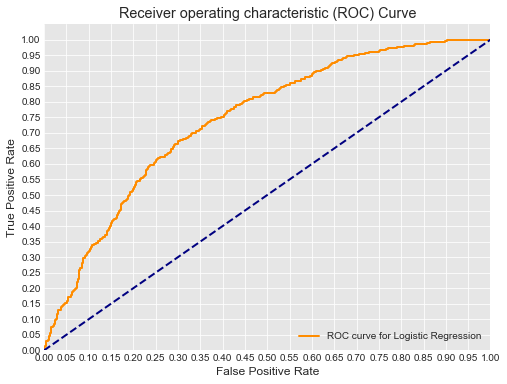

In [601]:
plot_roc_curve(fpr, tpr, "Logistic Regression")

AUC: 0.7429916732751783


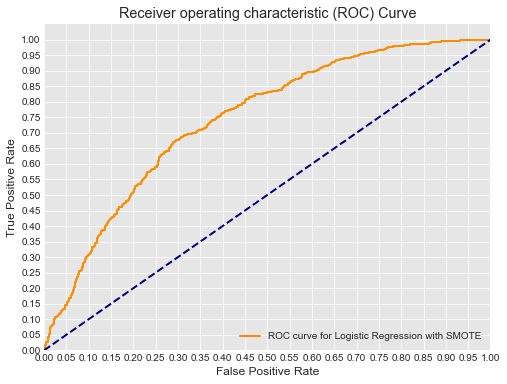

In [607]:
#logreg with SMOTE
model_log_sm = logreg.fit(X_train_sm, i_train_sm)
y_hat_train = logreg.predict(X_train_sm)

y_score = model_log_sm.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(i_test, y_score)
plot_roc_curve(fpr, tpr, "Logistic Regression with SMOTE")

AUC: 0.7529855350385299


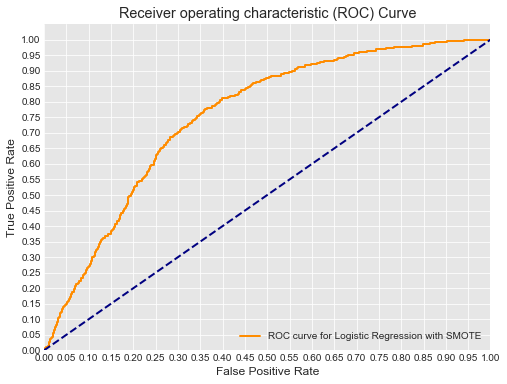

In [673]:
#normalized
model_log_n = logreg.fit(X_train_n, i_train_n)
y_hat_train = logreg.predict(X_train_n)

y_score = model_log_n.decision_function(X_test_n)

fpr, tpr, thresholds = roc_curve(i_test_n, y_score)
plot_roc_curve(fpr, tpr, "Logistic Regression with SMOTE")

Fitting 15 folds for each of 2 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    1.1s finished



best_model:
 LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
AUC: 0.7333645994261753


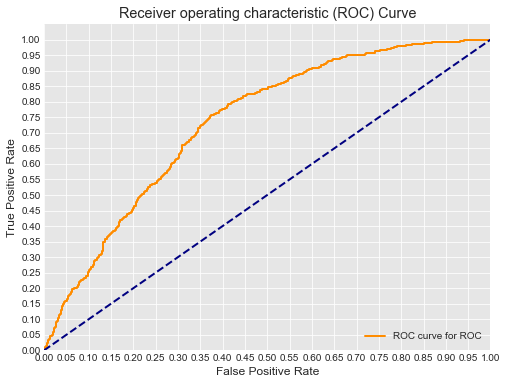


Classification report:
              precision    recall  f1-score   support

          0       0.84      0.54      0.66      3011
          1       0.52      0.83      0.64      1832

avg / total       0.72      0.65      0.65      4843



(LogisticRegression(C=0.01, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
 GridSearchCV(cv=ShuffleSplit(n_splits=15, random_state=2, test_size=0.3, train_size=None),
        error_score='raise',
        estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
        fit_params=None, iid=True, n_jobs=3,
        param_grid={'C': [0.001, 0.01]}, pre_dispatch='2*n_jobs',
        refit=True, return_train_score='warn', scoring='roc_auc', verbose=1),
 array([[0.49762972, 0.50237028],
        [0.49417014, 0.50582986],
        [0.36485237, 0.63514763],
        ...,
     

In [43]:
grid_search(LogisticRegression(class_weight = 'balanced'), param_grid1)

# SVC

In [674]:
svc_clf = SVC(kernel='linear')
svc = svc_clf.fit(X_train_n, i_train_n)
# svc_sm = svc_clf.fit(X_train_sm, i_train_sm)

In [675]:
svc.score(X_train_n, i_train_n)

0.688209787321908

In [676]:
svc.score(X_test_n, i_test_n)

0.684971098265896

In [ ]:
svc_sm = svc_clf.fit(X_train_sm, i_train_sm)

AUC: 0.7434041190362979


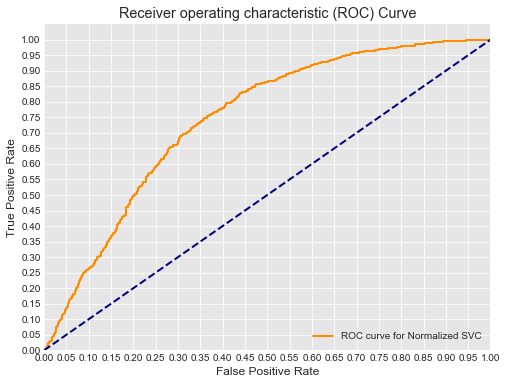

In [677]:
y_hat_train = svc_clf.predict(X_train_n)

y_score = svc.decision_function(X_test_n)

fpr, tpr, thresholds = roc_curve(i_test_n, y_score)
plot_roc_curve(fpr, tpr, "Normalized SVC")

In [ ]:
svc_clf = SVC(kernel='rbf')
svc = svc_clf.fit(X_train_n, i_train_n)

# Gradient Boosting

In [25]:
graboost = GradientBoostingClassifier(max_depth = 5, learning_rate = 0.05)
graboost.fit(X_train_n, i_train_n)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [27]:
graboost.score(X_train_n, i_train_n)

0.8201527978525707

In [28]:
graboost.score(X_test_n, i_test_n)

0.6979768786127167

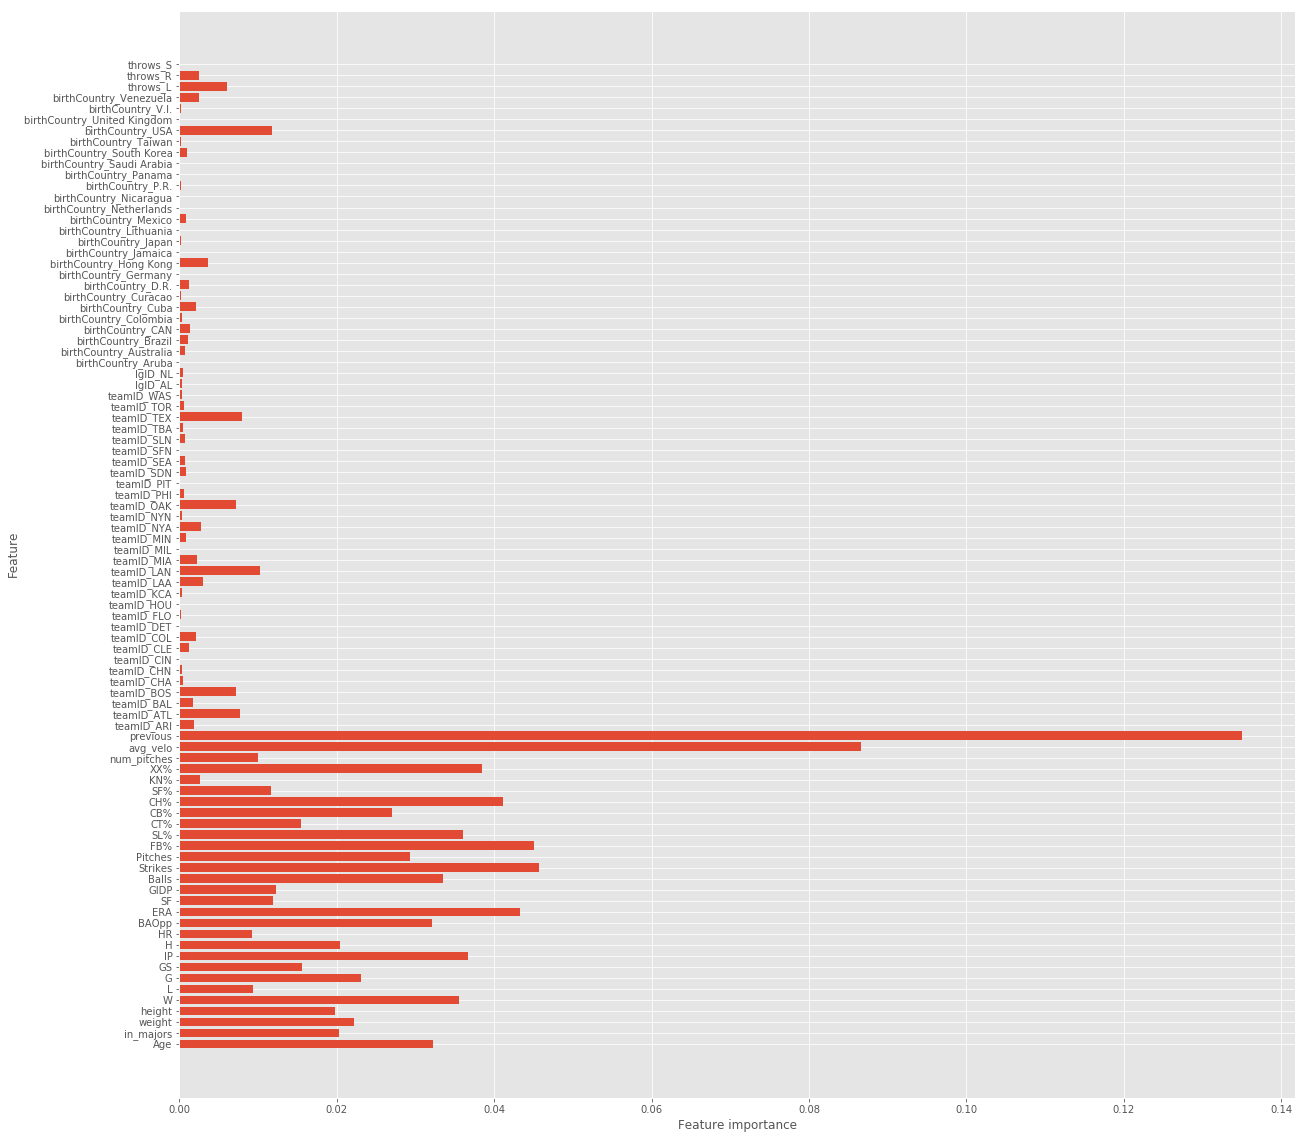

In [31]:
plot_feature_importances(graboost)

Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:   32.3s finished



best_model:
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=40,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
AUC: 0.6981818701327365


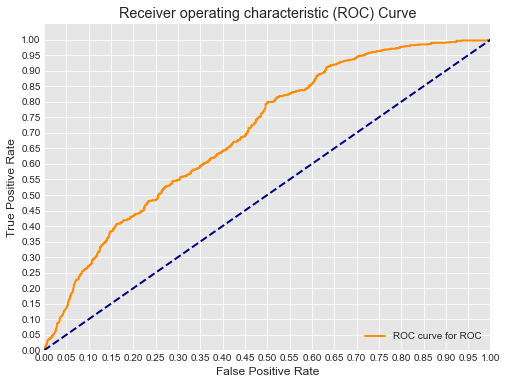


Classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3011
          1       1.00      1.00      1.00      1832

avg / total       1.00      1.00      1.00      4843



(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.5, loss='deviance', max_depth=40,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False),
 GridSearchCV(cv=ShuffleSplit(n_splits=15, random_state=2, test_size=0.2, train_size=None),
        error_score='raise',
        estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
           

In [38]:
#15 folds, at .5 learning rate
grid_search(GradientBoostingClassifier(), param_grid3)

Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:  2.5min finished



best_model:
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=40,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
AUC: 0.7045295109877983


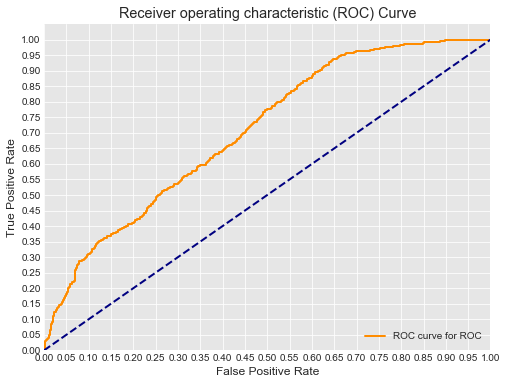


Classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3011
          1       1.00      1.00      1.00      1832

avg / total       1.00      1.00      1.00      4843



(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=40,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False),
 GridSearchCV(cv=ShuffleSplit(n_splits=15, random_state=2, test_size=0.3, train_size=None),
        error_score='raise',
        estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
           

In [42]:
#15 at .1 LR
grid_search(GradientBoostingClassifier(), param_grid3)

Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:  2.4min finished



best_model:
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=40,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Feature Importances: None
AUC: 0.7033969361856418


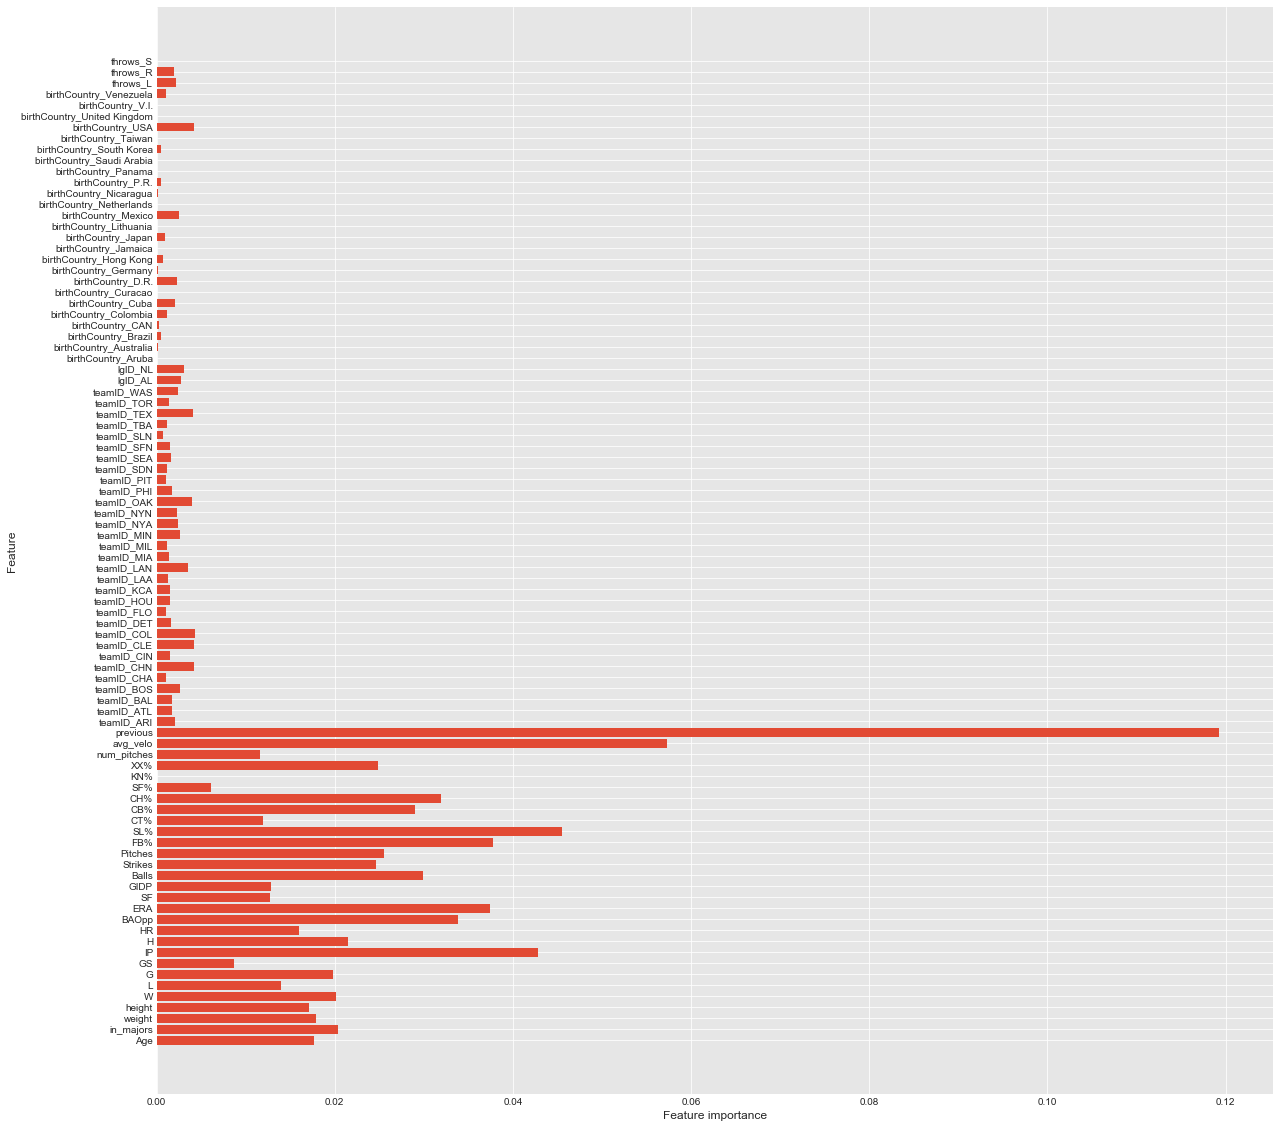

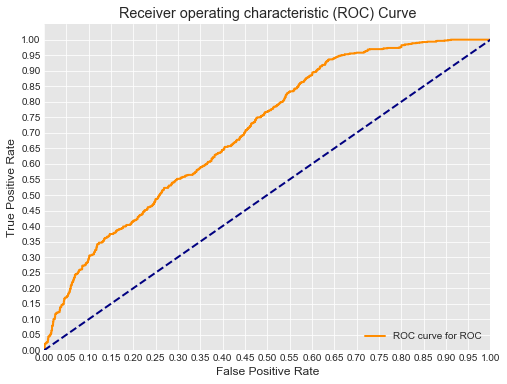


Classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3011
          1       1.00      1.00      1.00      1832

avg / total       1.00      1.00      1.00      4843



(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=40,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False),
 GridSearchCV(cv=ShuffleSplit(n_splits=15, random_state=2, test_size=0.3, train_size=None),
        error_score='raise',
        estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
           

In [74]:
grid_search(GradientBoostingClassifier(), param_grid3)

# AdaBoost

Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done 240 out of 240 | elapsed:   13.1s finished



best_model:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=0.01, n_estimators=1, random_state=None)
AUC: 0.6116889207680423


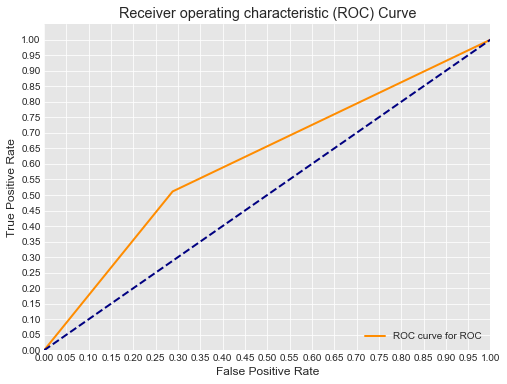


Classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3011
          1       1.00      1.00      1.00      1832

avg / total       1.00      1.00      1.00      4843



(AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='random'),
           learning_rate=0.01, n_estimators=1, random_state=None),
 GridSearchCV(cv=ShuffleSplit(n_splits=15, random_state=2, test_size=0.3, train_size=None),
        error_score='raise',
        estimator=AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=F

In [69]:
grid_search(AdaBoostClassifier(base_estimator= DecisionTreeClassifier()), param_grid5)

Fitting 15 folds for each of 16 candidates, totalling 240 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done 240 out of 240 | elapsed:   10.6s finished



best_model:
 AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
          learning_rate=0.01, n_estimators=1, random_state=None)

Feature Importances: None
AUC: 0.6226846013179053


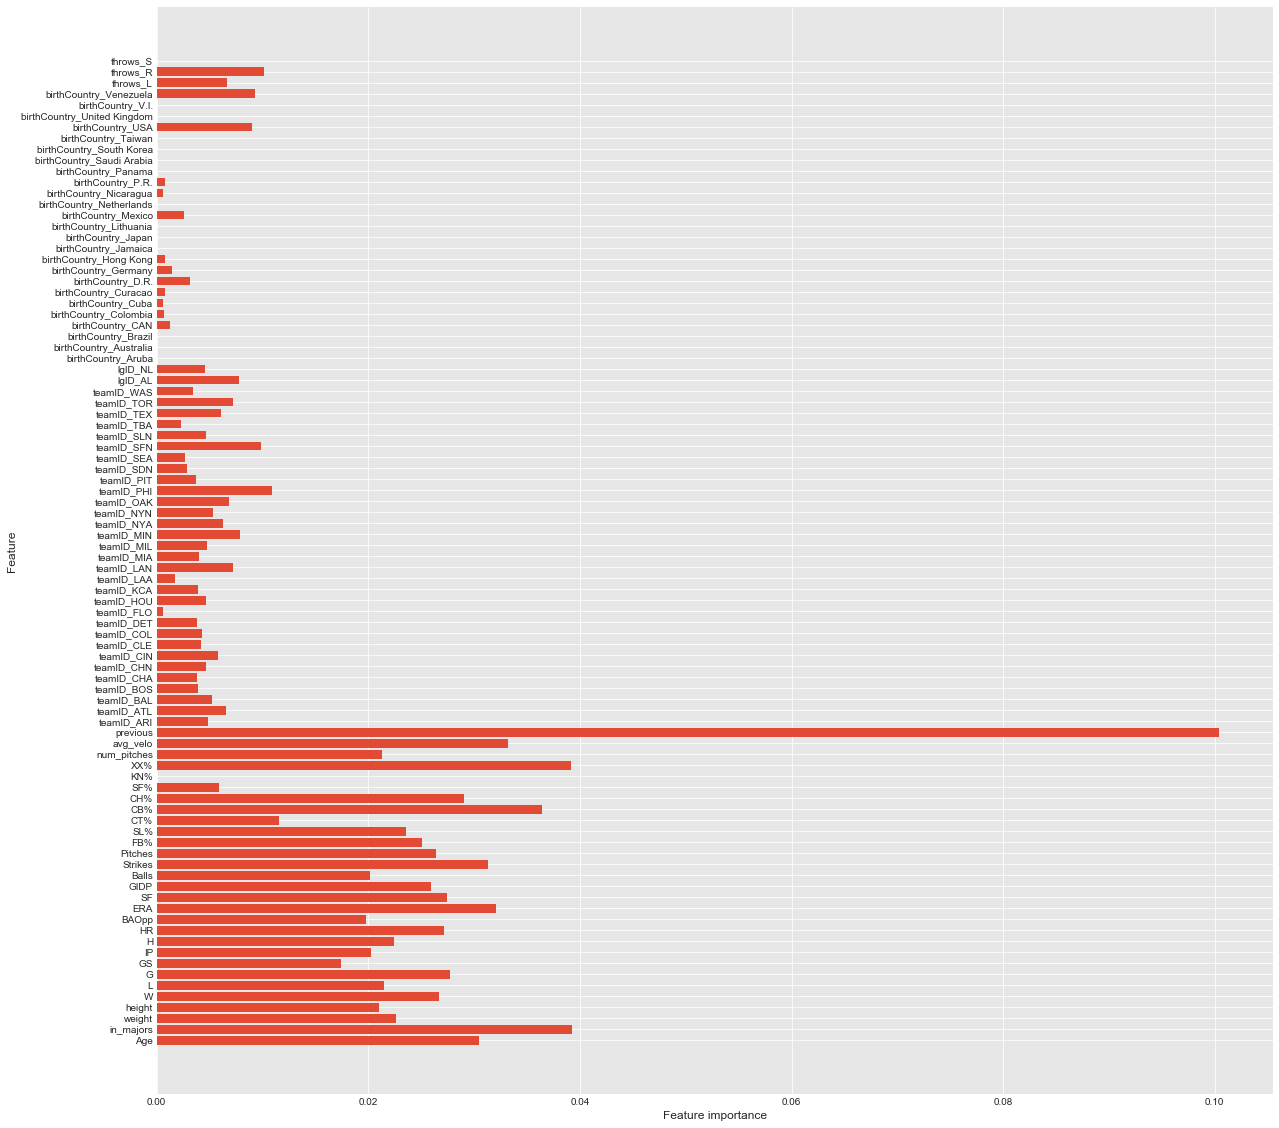

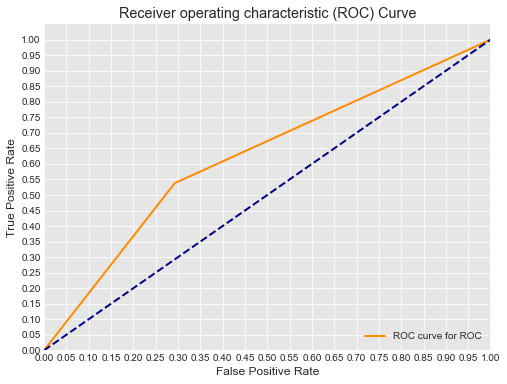


Classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      3011
          1       1.00      1.00      1.00      1832

avg / total       1.00      1.00      1.00      4843



(AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='random'),
           learning_rate=0.01, n_estimators=1, random_state=None),
 GridSearchCV(cv=ShuffleSplit(n_splits=15, random_state=2, test_size=0.3, train_size=None),
        error_score='raise',
        estimator=AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=F

In [73]:
grid_search(AdaBoostClassifier(base_estimator= DecisionTreeClassifier()), param_grid5)

# Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [79]:
linr = LinearRegression()
line = linr.fit(X_train_n, i_train_n)

In [80]:
line.score(X_train_n, i_train_n)

0.18659125757952189

In [81]:
line.score(X_test_n, i_test_n)

0.16244535626613799

In [83]:
linr = LinearRegression()
liner = linr.fit(data_norm, inj)

In [84]:
#estimated intercept coefficient
liner.intercept_

7898477067819.778

In [90]:
liner.coef_ # for our # of Coeffivcients

array([-2.33147513e-01, -7.49684243e-02,  1.86790348e-02,  6.44605749e-02,
       -3.06964411e-02,  3.74362386e-02,  3.57651906e-01,  5.45007008e-01,
       -1.49900087e-01, -6.27782193e-01, -8.19742969e-02, -2.19984232e-02,
       -3.82003819e-01, -5.59968955e-02,  1.06527281e-01,  1.00371045e+12,
        1.85658240e+12, -2.77712022e+12, -1.36466515e+01, -1.13356948e+01,
       -1.26317181e+01, -1.01924229e+01, -1.25912836e+01, -9.26905379e+00,
       -1.34806264e+01, -3.71569915e-01,  5.81948843e-02,  9.69685965e-01,
        3.11600812e-01,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  

In [88]:
liner.predict(X_test_n)

array([0.36621094, 0.40429688, 0.52148438, ..., 0.390625  , 0.58105469,
       0.62695312])

In [ ]:
OLS summary

In [91]:
olssum = sm.OLS(inj, data).fit()

In [93]:
olssum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                injured   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     18.12
Date:                Tue, 02 Oct 2018   Prob (F-statistic):          2.21e-236
Time:                        21:28:12   Log-Likelihood:                -4108.6
No. Observations:                6919   AIC:                             8389.
Df Residuals:                    6833   BIC:                             8978.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age                            -0.0078      0.003     -2.634      0.008      -0.014      -0.002
in_majors                      -0.0029      0.003     -0.983      0.326      -0.009       0.003
weight                          0.0001      0.000      0.374      0.708      -0.000       0.001
height                          0.0038      0.003      1.266      0.206      -0.002       0.010
W                              -0.0019      0.003     -0.537      0.591      -0.009       0.005
L                               0.0012      0.004      0.336      0.737      -0.006       0.008
G                               0.0040      0.001      6.691      0.000       0.003       0.005
GS                              0.0161      0.003      5.069      0.000       0.010       0.022
IP                             -0.0007      0.001     -0.482      0.630      -0.004       0.002
H                              -0.0024      0.001     -4.005      0.000      -0.004      -0.001
HR                             -0.0019      0.002     -0.997      0.319      -0.006       0.002
BAOpp                          -0.0169      0.092     -0.184      0.854      -0.197       0.163
ERA                            -0.0029      0.001     -2.438      0.015      -0.005      -0.001
SF                             -0.0047      0.004     -1.156      0.248      -0.013       0.003
GIDP                            0.0030      0.002      1.273      0.203      -0.002       0.008
Balls                          -0.0004      0.000     -3.497      0.000      -0.001      -0.000
Strikes                         0.0003      0.000      2.854      0.004       0.000       0.001
Pitches                     -1.765e-05   5.08e-05     -0.347      0.728      -0.000     8.2e-05
FB%                           -13.5656      9.745     -1.392      0.164     -32.668       5.537
SL%                           -13.4981      9.746     -1.385      0.166     -32.603       5.607
CT%                           -13.4447      9.745     -1.380      0.168     -32.548       5.659
CB%                           -13.4408      9.746     -1.379      0.168     -32.545       5.664
CH%                           -13.4721      9.745     -1.382      0.167     -32.576       5.632
SF%                           -13.4948      9.743     -1.385      0.166     -32.594       5.604
KN%                           -13.4044      9.745     -1.376      0.169     -32.507       5.698
XX%                            -0.7280      0.360     -2.024      0.043      -1.433      -0.023
num_pitches                     0.0084      0.008      1.002      0.316      -0.008       0.025
avg_velo                        0.0097      0.002      5.076      0.000       0.006       0.013
previous                        0.3115      0.013     24.571      0.000       0.287       0.336
teamID_ARI 

In [111]:
liner.coef_

array([-2.33147513e-01, -7.49684243e-02,  1.86790348e-02,  6.44605749e-02,
       -3.06964411e-02,  3.74362386e-02,  3.57651906e-01,  5.45007008e-01,
       -1.49900087e-01, -6.27782193e-01, -8.19742969e-02, -2.19984232e-02,
       -3.82003819e-01, -5.59968955e-02,  1.06527281e-01,  1.00371045e+12,
        1.85658240e+12, -2.77712022e+12, -1.36466515e+01, -1.13356948e+01,
       -1.26317181e+01, -1.01924229e+01, -1.25912836e+01, -9.26905379e+00,
       -1.34806264e+01, -3.71569915e-01,  5.81948843e-02,  9.69685965e-01,
        3.11600812e-01,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  1.91878740e+11,  1.91878740e+11,  1.91878740e+11,
        1.91878740e+11,  

In [114]:
coef_df = pd.DataFrame(list(zip(data.columns, liner.coef_)))

In [120]:
coef_df

0             1
0                           Age -2.331475e-01
1                     in_majors -7.496842e-02
2                        weight  1.867903e-02
3                        height  6.446057e-02
4                             W -3.069644e-02
5                             L  3.743624e-02
6                             G  3.576519e-01
7                            GS  5.450070e-01
8                            IP -1.499001e-01
9                             H -6.277822e-01
10                           HR -8.197430e-02
11                        BAOpp -2.199842e-02
12                          ERA -3.820038e-01
13                           SF -5.599690e-02
14                         GIDP  1.065273e-01
15                        Balls  1.003710e+12
16                      Strikes  1.856582e+12
17                      Pitches -2.777120e+12
18                          FB% -1.364665e+01
19                          SL% -1.133569e+01
20                          CT% -1.263172e+01
21                          CB% -1.019242e+01
22                          CH% -1.259128e+01
23                          SF% -9.269054e+00
24                          KN% -1.348063e+01
25                          XX% -3.715699e-01
26                  num_pitches  5.819488e-02
27                     avg_velo  9.696860e-01
28                     previous  3.116008e-01
29                   teamID_ARI  1.918787e+11
..                          ...           ...
60                      lgID_AL  1.020901e+11
61                      lgID_NL  1.020901e+11
62           birthCountry_Aruba -7.298454e+11
63       birthCountry_Australia -7.298454e+11
64          birthCountry_Brazil -7.298454e+11
65             birthCountry_CAN -7.298454e+11
66        birthCountry_Colombia -7.298454e+11
67            birthCountry_Cuba -7.298454e+11
68         birthCountry_Curacao -7.298454e+11
69            birthCountry_D.R. -7.298454e+11
70         birthCountry_Germany -7.298454e+11
71       birthCountry_Hong Kong -7.298454e+11
72         birthCountry_Jamaica -7.298454e+11
73           birthCountry_Japan -7.298454e+11
74       birthCountry_Lithuania -7.298454e+11
75          birthCountry_Mexico -7.298454e+11
76     birthCountry_Netherlands -7.298454e+11
77       birthCountry_Nicaragua -7.298454e+11
78            birthCountry_P.R. -7.298454e+11
79          birthCountry_Panama -7.298454e+11
80    birthCountry_Saudi Arabia -7.298454e+11
81     birthCountry_South Korea -7.298454e+11
82          birthCountry_Taiwan -7.298454e+11
83             birthCountry_USA -7.298454e+11
84  birthCountry_United Kingdom -7.298454e+11
85            birthCountry_V.I. -7.298454e+11
86       birthCountry_Venezuela -7.298454e+11
87                     throws_L -7.462600e+12
88                     throws_R -7.462600e+12
89                     throws_S -7.462600e+12

[90 rows x 2 columns]

In [124]:
max(coef_df[1])

1856582400578.464

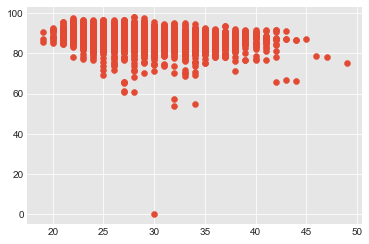

In [134]:
plt.scatter(pitchers.Age, pitchers.avg_velo)

In [96]:
no_team = pitchers.drop(columns = 'teamID')

In [135]:
no_team = pd.get_dummies(no_team)

In [137]:
olsnot = sm.OLS(inj, no_team).fit()
olsnot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                injured   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     26.46
Date:                Tue, 02 Oct 2018   Prob (F-statistic):          5.58e-241
Time:                        22:09:20   Log-Likelihood:                -4146.4
No. Observations:                6919   AIC:                             8405.
Df Residuals:                    6863   BIC:                             8788.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Age                            -0.0078      0.003     -2.638      0.008      -0.014      -0.002
in_majors                      -0.0028      0.003     -0.949      0.343      -0.009       0.003
weight                          0.0001      0.000      0.372      0.710      -0.000       0.001
height                          0.0040      0.003      1.330      0.184      -0.002       0.010
W                              -0.0013      0.003     -0.364      0.716      -0.008       0.006
L                               0.0006      0.004      0.175      0.861      -0.007       0.008
G                               0.0040      0.001      6.648      0.000       0.003       0.005
GS                              0.0164      0.003      5.171      0.000       0.010       0.023
IP                             -0.0010      0.001     -0.668      0.504      -0.004       0.002
H                              -0.0026      0.001     -4.233      0.000      -0.004      -0.001
HR                             -0.0020      0.002     -1.085      0.278      -0.006       0.002
BAOpp                          -0.0292      0.092     -0.317      0.751      -0.209       0.151
ERA                            -0.0029      0.001     -2.484      0.013      -0.005      -0.001
SF                             -0.0047      0.004     -1.146      0.252      -0.013       0.003
GIDP                            0.0035      0.002      1.492      0.136      -0.001       0.008
Balls                          -0.0004      0.000     -3.480      0.001      -0.001      -0.000
Strikes                         0.0003      0.000      2.930      0.003       0.000       0.001
Pitches                     -6.798e-06   5.05e-05     -0.135      0.893      -0.000    9.23e-05
FB%                           -13.7505      9.748     -1.411      0.158     -32.859       5.359
SL%                           -13.6847      9.749     -1.404      0.160     -32.796       5.427
CT%                           -13.6305      9.749     -1.398      0.162     -32.741       5.480
CB%                           -13.6240      9.749     -1.397      0.162     -32.736       5.488
CH%                           -13.6698      9.749     -1.402      0.161     -32.780       5.440
SF%                           -13.7150      9.746     -1.407      0.159     -32.820       5.390
KN%                           -13.5610      9.748     -1.391      0.164     -32.670       5.548
XX%                            -0.9165      0.358     -2.562      0.010      -1.618      -0.215
num_pitches                     0.0098      0.008      1.185      0.236      -0.006       0.026
avg_velo                        0.0098      0.002      5.159      0.000       0.006       0.013
previous                        0.3184      0.013     25.218      0.000       0.294       0.343
lgID_AL    

In [138]:
no_team.head()

Age  in_majors  weight  height     W    L     G   GS    IP     H    ...     \
0   27          5   215.0    75.0   3.0  6.0  73.0  0.0  71.1  49.0    ...      
1   32          3   170.0    74.0   0.0  0.0   2.0  0.0   6.0   3.0    ...      
2   32          3   170.0    74.0   0.0  0.0   3.0  0.0   6.0   7.0    ...      
3   27          4   195.0    72.0   0.0  0.0  26.0  0.0  24.2  23.0    ...      
4   26          1   205.0    74.0  10.0  1.0  43.0  1.0  84.0  69.0    ...      

   birthCountry_Saudi Arabia  birthCountry_South Korea  birthCountry_Taiwan  \
0                          0                         0                    0   
1                          0                         0                    0   
2                          0                         0                    0   
3                          0                         0                    0   
4                          0                         0                    0   

   birthCountry_USA  birthCountry_United Kingdom  birthCountry_V.I.  \
0                 1                            0                  0   
1                 0                            0                  0   
2                 0                            0                  0   
3                 1                            0                  0   
4                 0                            0                  0   

   birthCountry_Venezuela  throws_L  throws_R  throws_S  
0                       0         0         1         0  
1                       0         0         1         0  
2                       0         0         1         0  
3                       0         0         1         0  
4                       0         0         1         0  

[5 rows x 59 columns]

# Cross Validation

In [22]:
from sklearn.model_selection import KFold

In [23]:
kf_n = KFold(10, True)

In [44]:
from sklearn.model_selection import cross_val_score

In [47]:
scores = cross_val_score(LogisticRegression(), data_norm, inj, cv=10)
scores

array([0.68352601, 0.67485549, 0.66184971, 0.69653179, 0.69075145,
       0.63294798, 0.64306358, 0.66040462, 0.66040462, 0.69898698])

In [48]:
scores = cross_val_score(LogisticRegression(), data_norm, inj, cv=10)
scores

array([0.65317919, 0.66618497, 0.68641618, 0.69508671, 0.69219653,
       0.64884393, 0.6632948 , 0.6734104 , 0.69075145, 0.69175109])

In [49]:
scores = cross_val_score(GradientBoostingClassifier(), data_norm, inj, cv=10)
scores

array([0.66040462, 0.69797688, 0.67485549, 0.70520231, 0.73554913,
       0.6734104 , 0.6849711 , 0.67630058, 0.68063584, 0.70911722])

# Clustering

In [59]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [52]:
k_means = KMeans(n_clusters=10).fit(data_norm)

In [53]:
y_hat = k_means.predict(data_norm)

In [54]:
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
y_hat

array([2, 5, 5, ..., 6, 4, 2], dtype=int32)

In [61]:
# Call silhouette_score() below!
metrics.silhouette_score(data_norm, inj, metric = 'euclidean')

0.015670478934186015

In [62]:
metrics.calinski_harabaz_score(data_norm, inj)

110.70586712099649

In [65]:
k_means = KMeans(n_clusters=10).fit(data)

In [66]:
y_hat = k_means.predict(data_norm)
print(metrics.silhouette_score(data, inj, metric = 'euclidean'))
metrics.calinski_harabaz_score(data, inj)

0.08398419418131974


387.34489870460516

In [68]:
k_means = KMeans(n_clusters=5).fit(data)
y_hat = k_means.predict(data)
print(metrics.silhouette_score(data, inj, metric = 'euclidean'))
metrics.calinski_harabaz_score(data, inj)

0.08398419418131974


387.34489870460516

In [ ]:
def classification_model(model, x_train, x_test, y_train, y_test):
    model_ = model
    model_.fit(X_train, i_train)
    y_hat_test = model_.predict(X_test)
    model_y_score = model_.decision_function(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model_y_score)
    return model_, fpr, tpr, thresholds, y_hat_test

In [40]:

# Model Parameter Grids Ranges

#Logistic Regression
param_grid1 = {'C': [0.001, 0.01] }

#Random Forest
param_grid2 = {"n_estimators": range(20, 100, 2),
                  "max_depth": range(4, 40, 2),
                  "min_samples_leaf": range(2, 100, 2),
                  "max_features": range(1, 100+1),
                  "min_samples_split": range(2, 10),
                  "bootstrap": [True],
                  "criterion": ["gini", "entropy"]}

#Gradient Boost
param_grid3 = {'n_estimators': [100],
                  'learning_rate':[0.1],
                  'max_depth': [40]}

#AdaBoost
param_grid5 = {"base_estimator__criterion" : ["gini", "entropy"],
                   'learning_rate':[0.001, 0.01],
                   "base_estimator__splitter" :   ["best", "random"],
                   "n_estimators": [1, 2]}

In [71]:
def grid_search(clf, param_grid):
    global best_model, saved_model
    cv = ShuffleSplit(n_splits = 15, test_size = 0.30, random_state = 2)
    n_iter_search = 70
    estimator = GridSearchCV(clf,
                                   param_grid = param_grid,
                                   scoring = 'roc_auc',
                                   verbose = 1,
                                   cv = cv,
                                   n_jobs = 3)
        
    fit = estimator.fit(X_train_n, i_train_n)
    
    best_model = estimator.best_estimator_
    print('\nbest_model:\n', best_model)

    print('\nFeature Importances:', plot_feature_importances(best_model))
    
    y_predicted = best_model.predict(X_train_n)
    probabilities = best_model.predict_proba(X_test_n)
    y_score = best_model.decision_function(X_test_n)
    fpr, tpr, thresholds = metrics.roc_curve(i_test_n, y_score)
    
    plot_roc_curve(fpr, tpr)
    
    c_report = classification_report(i_train_n, y_predicted)
    print('\nClassification report:\n', c_report)
    return best_model, fit, probabilities, c_report #, fpr, tpr, thresholds

# MLP

In [184]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [161]:
y_train = keras.utils.to_categorical(i_train_n, 2)
y_test = keras.utils.to_categorical(i_test_n, 2)

In [167]:
model = Sequential()
model.add(Dense(25, activation='relu', input_shape=(90, )))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [156]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 25)                2275      
_________________________________________________________________
dense_10 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_11 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 52        
Total params: 3,627
Trainable params: 3,627
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [162]:
model = model.fit(X_train_n, y_train, batch_size=32, epochs=10, validation_data=(X_test_n, y_test))

Train on 4843 samples, validate on 2076 samples
Epoch 1/10
4843/4843 [==============================] - 2s 368us/step - loss: 0.6628 - acc: 0.6118 - val_loss: 0.6487 - val_acc: 0.6243
Epoch 2/10
4843/4843 [==============================] - 1s 151us/step - loss: 0.6442 - acc: 0.6236 - val_loss: 0.6360 - val_acc: 0.6349
Epoch 3/10
4843/4843 [==============================] - 1s 144us/step - loss: 0.6326 - acc: 0.6347 - val_loss: 0.6240 - val_acc: 0.6431
Epoch 4/10
4843/4843 [==============================] - 1s 151us/step - loss: 0.6208 - acc: 0.6434 - val_loss: 0.6108 - val_acc: 0.6599
Epoch 5/10
4843/4843 [==============================] - 1s 154us/step - loss: 0.6087 - acc: 0.6512 - val_loss: 0.6001 - val_acc: 0.6618
Epoch 6/10
4843/4843 [==============================] - 1s 146us/step - loss: 0.5986 - acc: 0.6525 - val_loss: 0.5934 - val_acc: 0.6773
Epoch 7/10
4843/4843 [==============================] - 1s 155us/step - loss: 0.5915 - acc: 0.6612 - val_loss: 0.5885 - val_acc: 0.6739


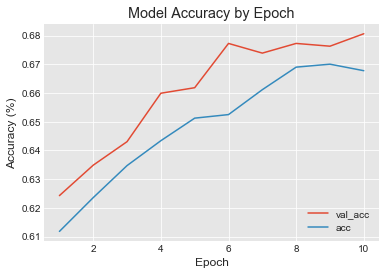

In [163]:
model.history
epochs = [i for i in range(1, 11)]
plt.figure()
plt.plot(epochs, model.history['val_acc'])
plt.plot(epochs, model.history['acc'])
plt.title("Model Accuracy by Epoch")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend(["val_acc", "acc"], loc=4)
plt.show()

In [169]:
model = model.fit(X_train_n, y_train, batch_size=32, epochs=50, validation_data=(X_test_n, y_test))

Train on 4843 samples, validate on 2076 samples
Epoch 1/50
4843/4843 [==============================] - 1s 293us/step - loss: 0.6711 - acc: 0.6122 - val_loss: 0.6608 - val_acc: 0.6204
Epoch 2/50
4843/4843 [==============================] - 1s 166us/step - loss: 0.6581 - acc: 0.6217 - val_loss: 0.6540 - val_acc: 0.6204
Epoch 3/50
4843/4843 [==============================] - 1s 170us/step - loss: 0.6497 - acc: 0.6219 - val_loss: 0.6434 - val_acc: 0.6248
Epoch 4/50
4843/4843 [==============================] - 1s 180us/step - loss: 0.6382 - acc: 0.6283 - val_loss: 0.6307 - val_acc: 0.6373
Epoch 5/50
4843/4843 [==============================] - 1s 164us/step - loss: 0.6259 - acc: 0.6389 - val_loss: 0.6173 - val_acc: 0.6440
Epoch 6/50
4843/4843 [==============================] - 1s 175us/step - loss: 0.6136 - acc: 0.6457 - val_loss: 0.6064 - val_acc: 0.6532
Epoch 7/50
4843/4843 [==============================] - 1s 161us/step - loss: 0.6039 - acc: 0.6471 - val_loss: 0.5983 - val_acc: 0.6643


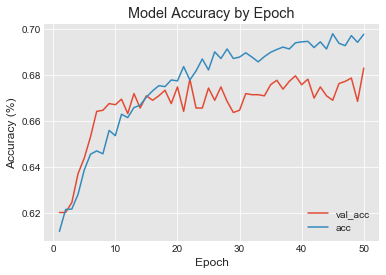

In [182]:
model_chart(model, 50)

In [181]:
def model_chart(model, ep):
    model.history
    epochs = [i for i in range(1, ep+1)]
    plt.figure()
    plt.plot(epochs, model.history['val_acc'])
    plt.plot(epochs, model.history['acc'])
    plt.title("Model Accuracy by Epoch")
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Epoch")
    plt.legend(["val_acc", "acc"], loc=4)
    plt.show()

In [191]:
model2 = Sequential()
model2.add(Dense(25, activation='relu', input_shape=(90, )))
model2.add(Dropout(.3))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(.3))
model2.add(Dense(25, activation='relu'))
model2.add(Dropout(.3))
model2.add(Dense(2, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [192]:
model2 = model2.fit(X_train_n, y_train, batch_size=32, epochs=25, validation_data=(X_test_n, y_test))

Train on 4843 samples, validate on 2076 samples
Epoch 1/25
4843/4843 [==============================] - 2s 439us/step - loss: 0.6782 - acc: 0.6011 - val_loss: 0.6662 - val_acc: 0.6204
Epoch 2/25
4843/4843 [==============================] - 1s 231us/step - loss: 0.6678 - acc: 0.6128 - val_loss: 0.6595 - val_acc: 0.6204
Epoch 3/25
4843/4843 [==============================] - 1s 237us/step - loss: 0.6607 - acc: 0.6184 - val_loss: 0.6538 - val_acc: 0.6204
Epoch 4/25
4843/4843 [==============================] - 1s 233us/step - loss: 0.6580 - acc: 0.6201 - val_loss: 0.6487 - val_acc: 0.6204
Epoch 5/25
4843/4843 [==============================] - 1s 223us/step - loss: 0.6524 - acc: 0.6234 - val_loss: 0.6431 - val_acc: 0.6204
Epoch 6/25
4843/4843 [==============================] - 1s 267us/step - loss: 0.6490 - acc: 0.6223 - val_loss: 0.6379 - val_acc: 0.6209
Epoch 7/25
4843/4843 [==============================] - 1s 257us/step - loss: 0.6423 - acc: 0.6261 - val_loss: 0.6296 - val_acc: 0.6199


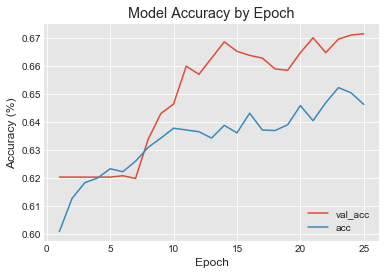

In [193]:
model_chart(model2, 25)

In [194]:
model3 = Sequential()
model3.add(Dense(25, activation='relu', input_shape=(90, )))
model3.add(Dropout(.3))
model3.add(Dense(50, activation='relu'))
model3.add(Dropout(.3))
model3.add(Dense(25, activation='relu'))
model3.add(Dropout(.3))
model3.add(Dense(2, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [195]:
model3 = model3.fit(X_train_n, y_train, batch_size=32, epochs=25, validation_data=(X_test_n, y_test))

Train on 4843 samples, validate on 2076 samples
Epoch 1/25
4843/4843 [==============================] - 2s 508us/step - loss: 0.6447 - acc: 0.6180 - val_loss: 0.6072 - val_acc: 0.6450
Epoch 2/25
4843/4843 [==============================] - 1s 243us/step - loss: 0.6033 - acc: 0.6455 - val_loss: 0.5857 - val_acc: 0.6667
Epoch 3/25
4843/4843 [==============================] - 1s 257us/step - loss: 0.5992 - acc: 0.6477 - val_loss: 0.5852 - val_acc: 0.6609
Epoch 4/25
4843/4843 [==============================] - 1s 251us/step - loss: 0.5913 - acc: 0.6587 - val_loss: 0.5819 - val_acc: 0.6546
Epoch 5/25
4843/4843 [==============================] - 1s 258us/step - loss: 0.5840 - acc: 0.6725 - val_loss: 0.5786 - val_acc: 0.6696
Epoch 6/25
4843/4843 [==============================] - 1s 261us/step - loss: 0.5789 - acc: 0.6669 - val_loss: 0.5770 - val_acc: 0.6652
Epoch 7/25
4843/4843 [==============================] - 1s 233us/step - loss: 0.5761 - acc: 0.6785 - val_loss: 0.5765 - val_acc: 0.6609


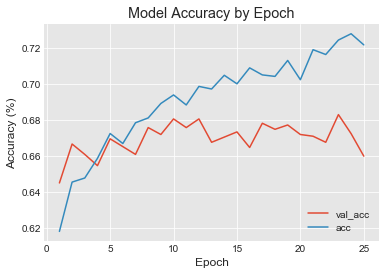

In [196]:
model_chart(model3, 25)

In [198]:
model4 = Sequential()
model4.add(Dense(25, activation='relu', input_shape=(90, )))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(25, activation='relu'))
model4.add(Dense(2, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [200]:
model4 = model4.fit(X_train_n, y_train, batch_size=32, epochs=25, validation_data=(X_test_n, y_test))

Train on 4843 samples, validate on 2076 samples
Epoch 1/25
4843/4843 [==============================] - 2s 473us/step - loss: 0.6198 - acc: 0.6484 - val_loss: 0.5983 - val_acc: 0.6469
Epoch 2/25
4843/4843 [==============================] - 1s 207us/step - loss: 0.5823 - acc: 0.6729 - val_loss: 0.5857 - val_acc: 0.6696
Epoch 3/25
4843/4843 [==============================] - 1s 229us/step - loss: 0.5744 - acc: 0.6859 - val_loss: 0.5777 - val_acc: 0.6792
Epoch 4/25
4843/4843 [==============================] - 1s 230us/step - loss: 0.5680 - acc: 0.6894 - val_loss: 0.5761 - val_acc: 0.6768
Epoch 5/25
4843/4843 [==============================] - 1s 217us/step - loss: 0.5639 - acc: 0.6923 - val_loss: 0.5742 - val_acc: 0.6792
Epoch 6/25
4843/4843 [==============================] - 1s 193us/step - loss: 0.5568 - acc: 0.6925 - val_loss: 0.5720 - val_acc: 0.6802
Epoch 7/25
4843/4843 [==============================] - 1s 208us/step - loss: 0.5551 - acc: 0.6965 - val_loss: 0.5799 - val_acc: 0.6773


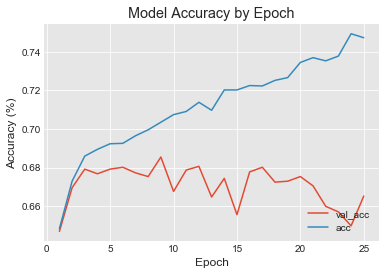

In [201]:
model_chart(model4, 25)

In [206]:
model5 = Sequential()
model5.add(Dense(25, activation='sigmoid', input_shape=(90, )))
model5.add(Dense(50, activation='sigmoid'))
model5.add(Dense(25, activation='sigmoid'))
model5.add(Dense(2, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [204]:
model5 = model5.fit(X_train_n, y_train, batch_size=32, epochs=25, validation_data=(X_test_n, y_test))

Train on 4843 samples, validate on 2076 samples
Epoch 1/25
4843/4843 [==============================] - 3s 526us/step - loss: 0.6646 - acc: 0.6217 - val_loss: 0.6589 - val_acc: 0.6204
Epoch 2/25
4843/4843 [==============================] - 1s 222us/step - loss: 0.6524 - acc: 0.6217 - val_loss: 0.6396 - val_acc: 0.6204
Epoch 3/25
4843/4843 [==============================] - 1s 227us/step - loss: 0.6221 - acc: 0.6337 - val_loss: 0.6032 - val_acc: 0.6546
Epoch 4/25
4843/4843 [==============================] - 1s 228us/step - loss: 0.5977 - acc: 0.6471 - val_loss: 0.5896 - val_acc: 0.6585
Epoch 5/25
4843/4843 [==============================] - 1s 227us/step - loss: 0.5858 - acc: 0.6622 - val_loss: 0.5884 - val_acc: 0.6614
Epoch 6/25
4843/4843 [==============================] - 1s 210us/step - loss: 0.5791 - acc: 0.6707 - val_loss: 0.5795 - val_acc: 0.6691
Epoch 7/25
4843/4843 [==============================] - 1s 226us/step - loss: 0.5735 - acc: 0.6758 - val_loss: 0.5776 - val_acc: 0.6715


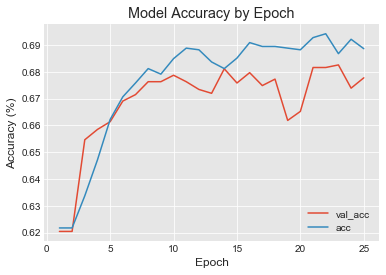

In [205]:
model_chart(model5, 25)